**Table of contents**<a id='toc0_'></a>    
- [set up](#toc1_)    
- [Fit six areas with 14 conditions](#toc2_)    
  - [Record of AIC and BIC to decide couping filter hyperparameters](#toc2_1_)    
  - [Fit](#toc2_2_)    
  - [Plot components](#toc2_3_)    
  - [Load saved filters and output under null](#toc2_4_)    
    - [Inference by max statistics and 2nd max statistics](#toc2_4_1_)    
    - [Original loading statistics only](#toc2_4_2_)    
- [Filters and inference on filters](#toc3_)    
- [Output and inference on output](#toc4_)    
- [Mean firing rate (spikes per sec per neuron)](#toc5_)    
- [Template firing rate](#toc6_)    
- [Basis and illustration of excursion test](#toc7_)    
- [Mean outputs from all trials in one plot](#toc8_)    
- [Plot all effect's output in an example trial](#toc9_)    
- [Simulation and explosion](#toc10_)    
  - [Explosion example](#toc10_1_)    
  - [$f_{damp}$ model doesn't explode](#toc10_2_)    
    - [Fit and simulate](#toc10_2_1_)    
    - [PSTH compare](#toc10_2_2_)    
    - [Single trial plot](#toc10_2_3_)    
    - [Correlation and partial correlation are not captured well in our model](#toc10_2_4_)    
- [Other plots](#toc11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[set up](#toc0_)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
if sys.platform == 'linux':
    sys.path.append("/home/qix/MultiNeuronGLM")
else:
    sys.path.append("D:/Github/MultiNeuronGLM")

In [2]:
import pandas as pd
import utility_functions as utils
import GLM
from DataLoader import Allen_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
# sns.set_theme()
sns.set_theme(style="white")
# sns.set_style('whitegrid')

In [3]:
# Load selected group_id
import pickle
with open('group_id_all_a_c/membership.pickle', 'rb') as handle:
    membership = pickle.load(handle)
with open('group_id_all_a_c/condition_ids.pickle', 'rb') as handle:
    condition_ids = pickle.load(handle)

In [39]:
probe_list = ['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF']

# Load data
start_time = 0.0
end_time = 0.25
padding = 0.1
V1 = Allen_dataset(fps=1000,
                   start_time=start_time, 
                   end_time=end_time,
                   padding=padding,
#                    orientation=[0],
                   session_id=757970808,
                   session_id=798911424,
                   selected_probes=['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF'],
#                    temporal_frequency=[1,2,4],
                #    stimulus_condition_id=[275, 277, 246, 255, 272, 248, 283, 266, 274, 276, 286, 271, 268, 270],
#                    stimulus_condition_id=[246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261, 
#                                           262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 273, 274, 275, 276, 277,
#                                           278, 279, 280, 281, 282, 283, 284, 285, 286, 270],
                   stimulus_name=['drifting_gratings'],
                #    stimulus_name=['drifting_gratings', 'gabors', 'flashes', 'static_gratings']
                   )

# V1.get_lfp()
# V1.remove_padding(padding)
V1.get_trial_metric_per_unit_per_trial()
# V1.get_trial_metric_per_unit_per_trial(metric_type='spike_times')
V1.get_running(method="mine")

Downloading:   0%|          | 0.00/2.38G [00:00<?, ?B/s]

/home/qix/anaconda3/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/qix/anaconda3/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/qix/anaconda3/lib/python3.9/site-packages/allensdk/brain_observatory/ecephys/stimulus_table/naming_utilities.py:154: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movie_rows = table[stim_colname].str.contains(movie_re, na=False)
/home/qix/anaconda3/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' ve

In [50]:
V1._session

In [42]:
V1._session.api

In [51]:
V1._session.get_pupil_data()

/home/qix/anaconda3/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/qix/anaconda3/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


corneal_reflection_center_x  corneal_reflection_center_y  \
Time (s)                                                               
3.16469                      333.250192                   219.664844   
3.20071                      332.642914                   218.899879   
3.21427                      332.301767                   218.809234   
3.24781                      332.602457                   219.096800   
3.28091                      332.556926                   219.262201   
...                                 ...                          ...   
9645.32140                   332.845283                   219.954914   
9645.35476                   332.690447                   219.776907   
9645.38834                   332.368212                   218.910905   
9645.42153                   332.097683                   216.906058   
9645.45572                   332.210954                   216.321448   

            corneal_reflection_height  corneal_reflection_width  \
Time (s)                                                          
3.16469                     15.780427                 17.547557   
3.20071                     15.744800                 18.008087   
3.21427                     15.737957                 18.194263   
3.24781                     15.406794                 18.355085   
3.28091                     15.284284                 18.355759   
...                               ...                       ...   
9645.32140                  14.333281                 17.685420   
9645.35476                  14.106625                 17.979630   
9645.38834                  14.110046                 18.179020   
9645.42153                  13.638718                 16.915555   
9645.45572                  13.934314                 16.925462   

            corneal_reflection_phi  pupil_center_x  pupil_center_y  \
Time (s)                                                             
3.16469                   0.389647             NaN             NaN   
3.20071                   0.322607             NaN             NaN   
3.21427                   0.369468             NaN             NaN   
3.24781                   0.333584             NaN             NaN   
3.28091                   0.317634             NaN             NaN   
...                            ...             ...             ...   
9645.32140                0.313068             NaN             NaN   
9645.35476                0.294923             NaN             NaN   
9645.38834                0.223545             NaN             NaN   
9645.42153                0.170477             NaN             NaN   
9645.45572                0.129876             NaN             NaN   

            pupil_height  pupil_width  pupil_phi  eye_center_x  eye_center_y  \
Time (s)                                                                       
3.16469              NaN          NaN        NaN    322.511376    213.460180   
3.20071              NaN          NaN        NaN    320.874535    212.401910   
3.21427              NaN          NaN        NaN    320.376925    212.292057   
3.24781              NaN          NaN        NaN    320.813267    212.291581   
3.28091              NaN          NaN        NaN    321.634476    212.929850   
...                  ...          ...        ...           ...           ...   
9645.32140           NaN          NaN        NaN    308.976611    199.362185   
9645.35476           NaN          NaN        NaN    307.049571    200.679880   
9645.38834           NaN          NaN        NaN    306.815110    200.466489   
9645.42153           NaN          NaN        NaN    306.368743    199.888402   
9645.45572           NaN          NaN        NaN    305.275533    199.048956   

            eye_height   eye_width   eye_phi  
Time (s)                                      
3.16469     281.221142  337.027312  0.112742  
3.20071     281.415907  332.663883  0.082676  
3.21427     281.448508  332.386196  0.080798  
3.24781     281.

In [7]:
(V1._session.stimulus_presentations['stimulus_name']=='drifting_gratings').sum()

630

In [35]:
sessions = V1._cache.get_session_table()

In [38]:
sessions

published_at  specimen_id             session_type  \
id                                                                      
715093703  2019-10-03T00:00:00Z    699733581    brain_observatory_1.1   
719161530  2019-10-03T00:00:00Z    703279284    brain_observatory_1.1   
721123822  2019-10-03T00:00:00Z    707296982    brain_observatory_1.1   
732592105  2019-10-03T00:00:00Z    717038288    brain_observatory_1.1   
737581020  2019-10-03T00:00:00Z    718643567    brain_observatory_1.1   
739448407  2019-10-03T00:00:00Z    716813543    brain_observatory_1.1   
742951821  2019-10-03T00:00:00Z    723627604    brain_observatory_1.1   
743475441  2019-10-03T00:00:00Z    722882755    brain_observatory_1.1   
744228101  2019-10-03T00:00:00Z    719817805    brain_observatory_1.1   
746083955  2019-10-03T00:00:00Z    726170935    brain_observatory_1.1   
750332458  2019-10-03T00:00:00Z    726141251    brain_observatory_1.1   
750749662  2019-10-03T00:00:00Z    726162197    brain_observatory_1.1   
751348571  2019-10-03T00:00:00Z    732548380    brain_observatory_1.1   
754312389  2019-10-03T00:00:00Z    719828690    brain_observatory_1.1   
754829445  2019-10-03T00:00:00Z    726298253    brain_observatory_1.1   
755434585  2019-10-03T00:00:00Z    730760270    brain_observatory_1.1   
756029989  2019-10-03T00:00:00Z    734865738    brain_observatory_1.1   
757216464  2019-10-03T00:00:00Z    733457989    brain_observatory_1.1   
757970808  2019-10-03T00:00:00Z    730756780    brain_observatory_1.1   
758798717  2019-10-03T00:00:00Z    735109609    brain_observatory_1.1   
759883607  2019-10-03T00:00:00Z    740268986    brain_observatory_1.1   
760345702  2019-10-03T00:00:00Z    739783171    brain_observatory_1.1   
760693773  2019-10-03T00:00:00Z    738651054    brain_observatory_1.1   
761418226  2019-10-03T00:00:00Z    742714475    brain_observatory_1.1   
762120172  2019-10-03T00:00:00Z    745276236    brain_observatory_1.1   
762602078  2019-10-03T00:00:00Z    744915204    brain_observatory_1.1   
763673393  2019-10-03T00:00:00Z    742602892    brain_observatory_1.1   
766640955  2019-10-03T00:00:00Z    744912849  functional_connectivity   
767871931  2019-10-03T00:00:00Z    753795610  functional_connectivity   
768515987  2019-10-03T00:00:00Z    754477358  functional_connectivity   
771160300  2019-10-03T00:00:00Z    754488979  functional_connectivity   
771990200  2019-10-03T00:00:00Z    756578435  functional_connectivity   
773418906  2019-10-03T00:00:00Z    757329624    brain_observatory_1.1   
774875821  2019-10-03T00:00:00Z    759711152  functional_connectivity   
778240327  2019-10-03T00:00:00Z    760938797  functional_connectivity   
778998620  2019-10-03T00:00:00Z    759674770  functional_connectivity   
779839471  2019-10-03T00:00:00Z    760960653  functional_connectivity   
781842082  2019-10-03T00:00:00Z    760946813  functional_connectivity   
786091066  2019-10-03T00:00:00Z    763884103  functional_connectivity   
787025148  2019-10-03T00:00:00Z    763236014  functional_connectivity   
789848216  2019-10-03T00:00:00Z    763808604  functional_connectivity   
791319847  2019-10-03T00:00:00Z    769360779    brain_observatory_1.1   
793224716  2019-10-03T00:00:00Z    769319624  functional_connectivity   
794812542  2019-10-03T00:00:00Z    774672366  functional_connectivity   
797828357  2019-10-03T00:00:00Z    776061251    brain_observatory_1.1   
798911424  2019-10-03T00:00:00Z    775876828    brain_observatory_1.1   
799864342  2019-10-03T00:00:00Z    772616823    brain_observatory_1.1   
816200189  2019-10-03T00:00:00Z    791857608  functional_connectivity   
819186360  2019-10-03T00:00:00Z    800249587  functional_connectivity   
819701982  2019-10-03T00:00:00Z    795770036  functional_connectivity   
821695405  2019-10-03T00:00:00Z    800250057  functional_connectivity   
829720705  2019-10-03T00:00:00Z    811322619  functional_connectivity   
831882777  2019-10-03T00:00:00Z    803390291  functional_connectivity   
8354

In [ ]:
V1._session.stimulus_conditions['stimulus_name'].unique()

array(['spontaneous', 'gabors', 'flashes', 'drifting_gratings',
       'natural_movie_three', 'natural_movie_one', 'static_gratings',
       'natural_scenes'], dtype=object)

In [44]:
### Get spikes_list and save to pickle
df = membership[0]
ntrial = V1.spike_train.shape[1]
nt = len(V1.spike_train.iloc[0,0])
neuron_list = []
for probe in probe_list:
    filtered_df = df[df['probe'] == probe]
    temp = filtered_df.index.tolist()  # Collect unit_ids into a list
    neuron_list.append(temp)  # Append the list to the main list

spikes = []
for i_probe, probe in enumerate(probe_list):
    temp = np.zeros((len(neuron_list[i_probe]), nt, ntrial), dtype='float32')
    for i_neuron, neuron in enumerate(neuron_list[i_probe]):
        for itrial in range(ntrial):
            temp[i_neuron, :, itrial] = V1.spike_train.loc[neuron].iloc[itrial]
    spikes.append(temp.transpose(2,0,1)) # Standard shape (ntrial, nneuron, nt)

exp = 
with open('/home/qix/user_data/allen_spike_trains/'+str(V1.session_id)+V1.stimulus_name[0]+'.pkl', 'wb') as f:
    pickle.dump(spikes, f)
    
with open('/home/qix/user_data/allen_spike_trains/'+str(V1.session_id)+V1.stimulus_name[0]+'.pkl', 'rb') as f:
    spikes = pickle.load(f)

In [ ]:
probe_list = ['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF']

mean_num_neuron = []
for iprobe, probe in enumerate(probe_list):
    num_cross_pop = []
    for icondition in range(len(membership)):
        aaa = membership[icondition]
        num_cross_pop.append( len(aaa[np.logical_and( aaa['probe']==probe , aaa['group_id']==0)]) )
    print(f"{probe} has {np.mean(num_cross_pop)} neurons in cross-pop in average. ")
    mean_num_neuron.append(np.mean(num_cross_pop))

probeA has 12.225 neurons in cross-pop in average. 
probeB has 14.95 neurons in cross-pop in average. 
probeC has 16.9 neurons in cross-pop in average. 
probeD has 10.625 neurons in cross-pop in average. 
probeE has 7.375 neurons in cross-pop in average. 
probeF has 8.225 neurons in cross-pop in average. 


In [ ]:
probe_list = ['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF']

num_neuron = []
for iprobe, probe in enumerate(probe_list):
    num_cross_pop = []
    for icondition in range(len(membership)):
        aaa = membership[icondition]
        num_cross_pop.append( len(aaa[np.logical_and( aaa['probe']==probe , aaa['group_id'].isin([0,1,2]))]) )
    print(f"{probe} has {np.mean(num_cross_pop)} neurons. ")
    num_neuron.append(np.mean(num_cross_pop))

probeA has 64.0 neurons. 
probeB has 60.0 neurons. 
probeC has 85.0 neurons. 
probeD has 53.0 neurons. 
probeE has 53.0 neurons. 
probeF has 37.0 neurons. 


# <a id='toc2_'></a>[Fit six areas with 14 conditions](#toc0_)

## <a id='toc2_1_'></a>[Record of AIC and BIC to decide couping filter hyperparameters](#toc0_)

parameters used
```
num_f_refractory = 4
max_iter = 10
self_effect = False
tau = 15
coupling_filter_params = {'peaks_max':15.2, 'num':3, 'nonlinear':0.5}
num_basis_baseline = 20
penalty = 3e-1
AIC improvement of the model is: 6857.286720926291
BIC improvement of the model is: 9403.707517772797

num_f_refractory = 4
max_iter = 10
tau = 15
coupling_filter_params = {'peaks_max':20.2, 'num':3, 'nonlinear':0.5}
num_basis_baseline = 20
penalty = 5e-1
AIC improvement of the model is: 6693.236375827226
BIC improvement of the model is: 9239.657172673731

num_f_refractory = 4
max_iter = 10
tau = 15
coupling_filter_params = {'peaks_max':30, 'num':4, 'nonlinear':0.5}
num_basis_baseline = 20
penalty = 3e-1
AIC improvement of the model is: 7294.3920674029505
BIC improvement of the model is: 9204.207665037946
```

## <a id='toc2_2_'></a>[Fit](#toc0_)

In [ ]:
# The following hyperparameters turned out to be the best
num_f_refractory = 4
max_iter = 10
tau = 15
coupling_filter_params = {'peaks_max':20.2, 'num':3, 'nonlinear':0.5}
num_basis_baseline = 20
penalty = 5e-1

################ No need to change below
probe_list = V1.selected_probes
running_filter = {}
stationary_filter = {}
running_output = {}
stationary_output = {}

ROI_filter = {}
statistics_filter = {}
ROI_output = {}
statistics_output = {}

running_model_list = []
stationary_model_list = []

for i, target_probe in tqdm(enumerate(probe_list)):
    select_trials = V1.all_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j], apply_no_penalty=True, **coupling_filter_params)
    model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
#     model.add_effect('refractory', target_probe, tau=tau, order=1.5, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    running_model_list.append(model)
    
    filter_list = model.get_filter(ci=True)
    for j in range(len(model.basis_list)):
        running_filter[i,j-1] = filter_list[j]
    output_list = model.get_filter_output(intermediate=False, ci=True)
    for j in range(len(model.basis_list)):
        running_output[i,j-1] = output_list[j]
    
    select_trials = V1.stationary_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j],apply_no_penalty=True, **coupling_filter_params)
    model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
#     model.add_effect('refractory', target_probe, tau=tau, order=1.5, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    stationary_model_list.append(model)
    
    filter_list = model.get_filter(ci=True)
    for j in range(len(model.basis_list)):
        stationary_filter[i,j-1] = filter_list[j]
    output_list = model.get_filter_output(intermediate=False, ci=True)
    for j in range(len(model.basis_list)):
        stationary_output[i,j-1] = output_list[j]
    
aic = np.sum([model.aic for model in stationary_model_list]+[model.aic for model in running_model_list])
baseline_aic = 570714.232742189
print(f"AIC improvement of the model is: {(baseline_aic - aic)}")

bic = np.sum([model.bic for model in stationary_model_list]+[model.bic for model in running_model_list])
baseline_bic = 588924.4932276756
print(f"BIC improvement of the model is: {(baseline_bic - bic)}")

0it [00:00, ?it/s]

6it [02:27, 24.61s/it]

AIC improvement of the model is: -274384.06665756344
BIC improvement of the model is: -279941.4756391923


In [ ]:
method = 'default'

for i, target_probe in (enumerate(probe_list)):
    # for effect filter
    filter_index = i,-1
    function1 = np.exp( running_filter[filter_index][0] )
    function2 = np.exp( stationary_filter[filter_index][0] )
    std1 = function1*np.exp(running_filter[filter_index][1]**2/2)*np.sqrt(np.exp(running_filter[filter_index][1]**2)-1)
    std2 = function1*np.exp(stationary_filter[filter_index][1]**2/2)*np.sqrt(np.exp(stationary_filter[filter_index][1]**2)-1)
    # statistics_filter[filter_index], ROI_filter[filter_index] = GLM.get_excursion_statistic_single_trial([function1, function2, std1, std2],
    #                                                                                                      method=method)
    for j, input_probe in enumerate(probe_list):
        filter_index = i,j
        function1 = running_filter[filter_index][0]
        function2 = stationary_filter[filter_index][0]
        std1 = running_filter[filter_index][1]
        std2 = stationary_filter[filter_index][1]
        statistics_filter[filter_index], ROI_filter[filter_index] = GLM.get_excursion_statistic_single_trial([function1, function2, std1, std2], 
                                                                                                            method=method)

    # for effect output
    filter_index = i,-1
    function1 = np.exp( running_output[filter_index][0] )
    function2 = np.exp( stationary_output[filter_index][0] )
    std1 = function1*np.exp(running_output[filter_index][1]**2/2)*np.sqrt(np.exp(running_output[filter_index][1]**2)-1)
    std2 = function1*np.exp(stationary_output[filter_index][1]**2/2)*np.sqrt(np.exp(stationary_output[filter_index][1]**2)-1)
    # statistics_output[filter_index], ROI_output[filter_index] = GLM.get_excursion_statistic_single_trial([function1, function2, std1, std2], 
    #                                                                                                     method=method)
    for j, input_probe in enumerate(probe_list):
        filter_index = i,j
        function1 = running_output[filter_index][0]
        function2 = stationary_output[filter_index][0]
        std1 = running_output[filter_index][1]
        std2 = stationary_output[filter_index][1]
        statistics_output[filter_index], ROI_output[filter_index] = GLM.get_excursion_statistic_single_trial([function1, function2, std1, std2], 
                                                                                                            method=method)

## <a id='toc2_3_'></a>[Plot components](#toc0_)

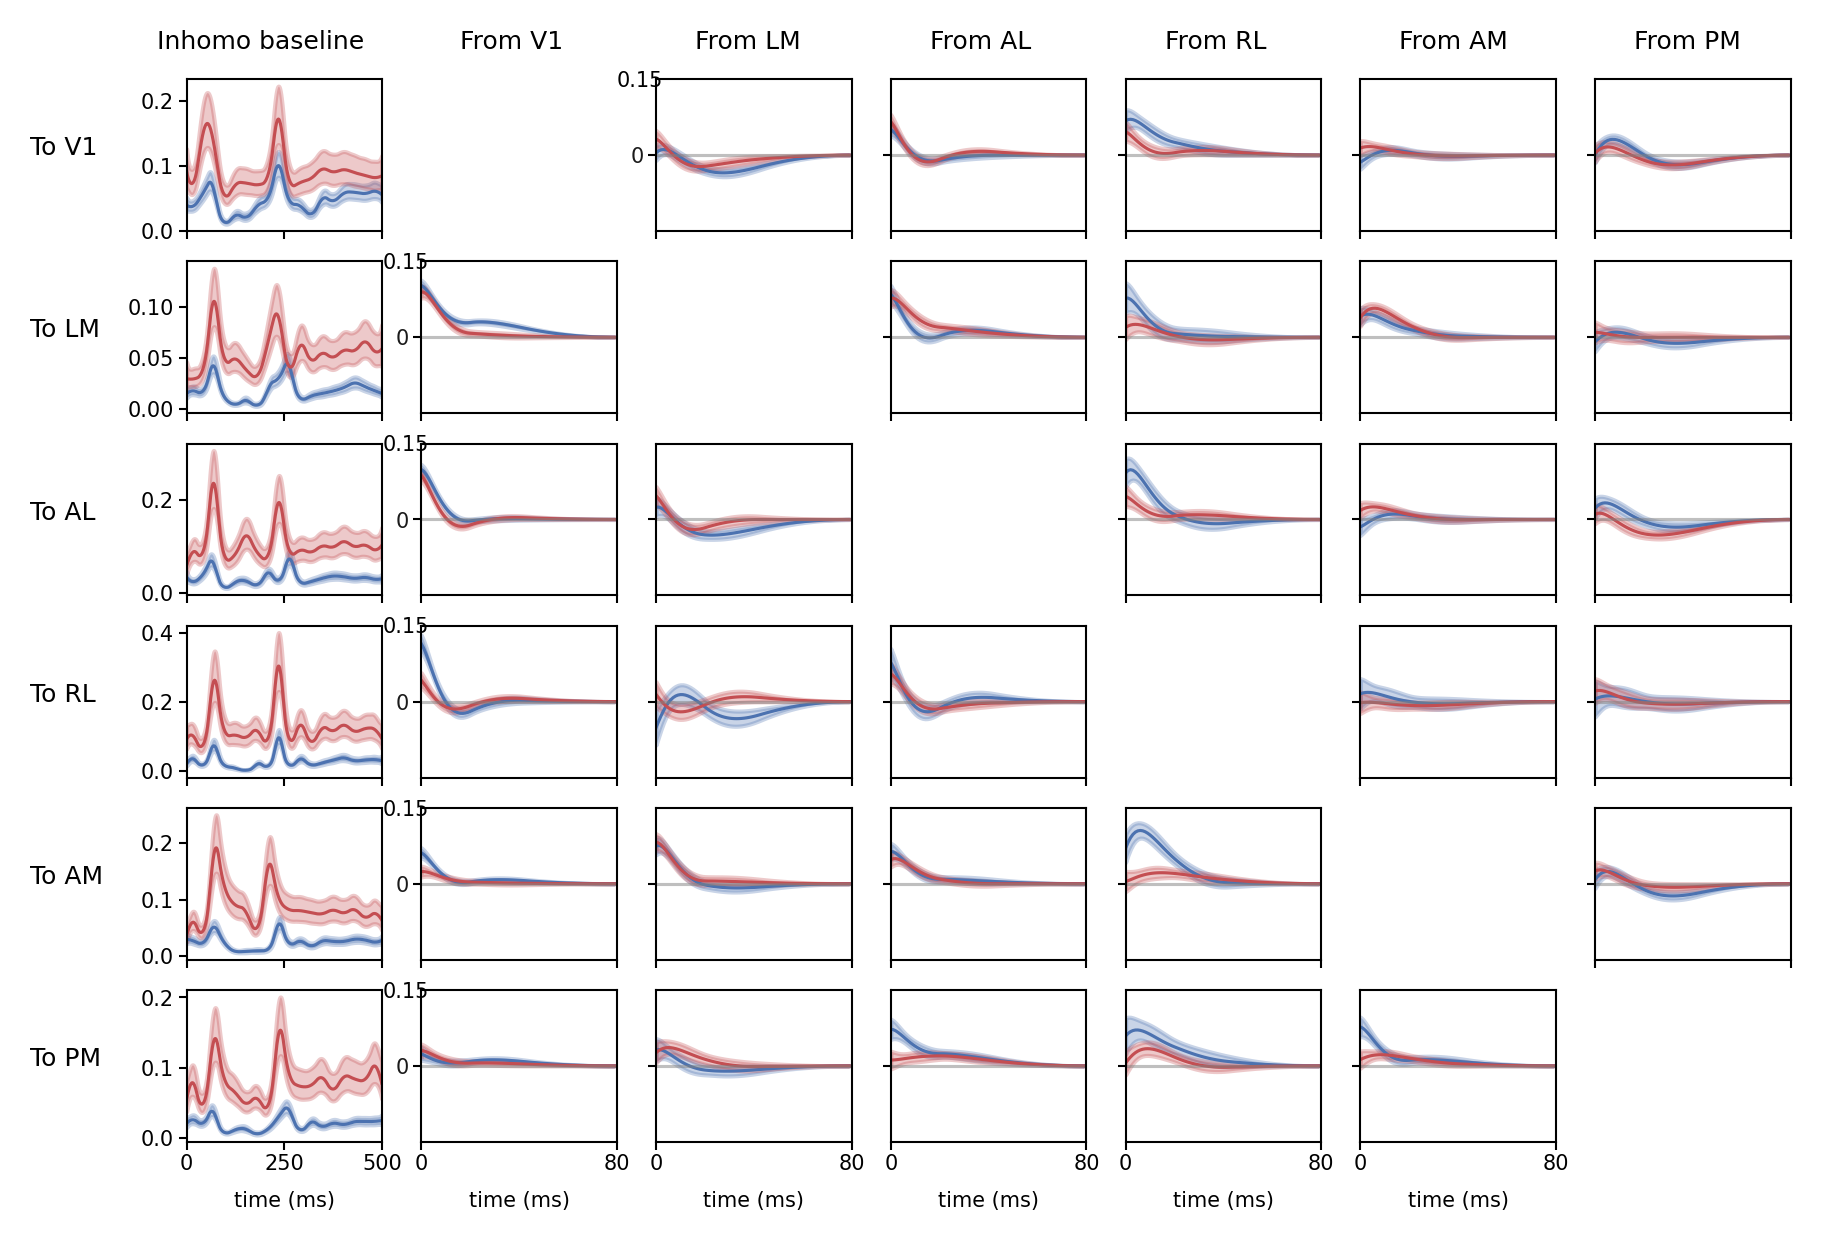

In [ ]:
GLM.plot_function_with_excursion(V1, stationary_filter, running_filter, inference=False, plot_baseline=True, 
                              plot_self=False, dpi=300)
plt.show()

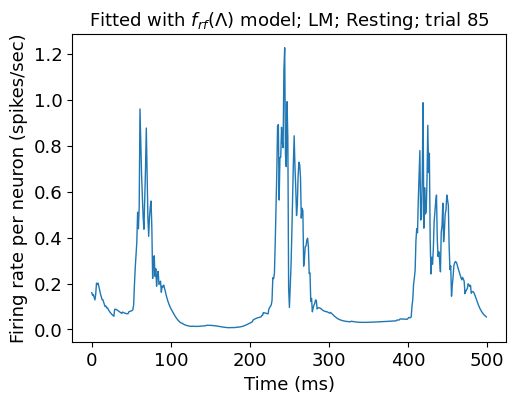

In [ ]:
fontsize = 13
plt.subplots(figsize=(4*1.4,4))

# plt.plot(np.exp(stationary_model_list[3].log_lmbd[:, 85])/10.625*1e3, linewidth=1)
plt.plot(np.exp(stationary_model_list[3].log_lmbd[:, 85]), linewidth=1)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("Time (ms)", fontsize=fontsize)
plt.ylabel("Firing rate per neuron (spikes/sec)", fontsize=fontsize)
plt.title("Fitted with $f_{rf}(\Lambda)$ model; LM; Resting; trial 85", fontdict = {'fontsize' : fontsize})
plt.show()

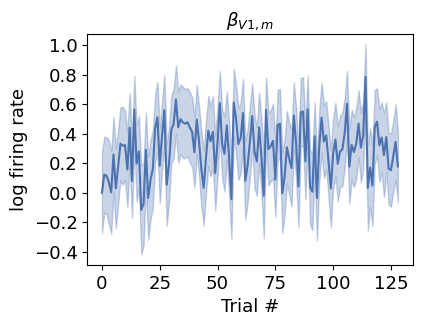

In [ ]:
fontsize = 13
plt.subplots(figsize=(3*1.4,3))

utils.plot_ci(stationary_model_list[2].get_filter(ci=True)[8], center=True, linewidth=1.5)

plt.xlabel('Trial #', fontsize=fontsize)
plt.ylabel('log firing rate', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title(r'$\beta_{V1, m}$', fontdict = {'fontsize' : fontsize})
plt.show()

/tmp/ipykernel_12079/1329308683.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3, ii+1)


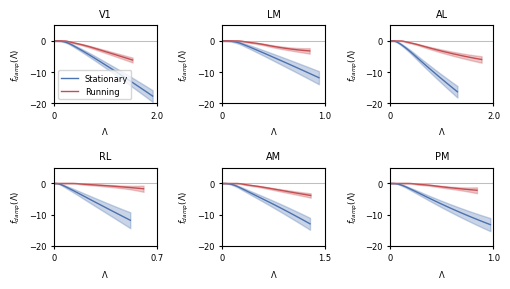

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(5.2,3))
transfer_ij = {4:0, 5:1, 0:2, 1:3, 2:4, 3:5}
xrange = [200, 100, 200, 70, 150, 100]

model_list = stationary_model_list + running_model_list
for ii in range(6):
    i = transfer_ij[ii]

    plt.subplot(2,3, ii+1)
    model = model_list[i]
    utils.plot_ci(model.get_filter(ci=True)[7], center=True, color='b', label="Stationary")
    plt.xlabel('$\Lambda$')
    plt.ylim([-20, 5])
    plt.xlim([0, 200])
    plt.xticks([0, 100, 200], [0, 1, 2])
    plt.title(utils.PROBE_CORRESPONDING[probe_list[i]]+"; Resting")

    plt.subplot(2,3, ii+1)
    model = model_list[i+6]
    utils.plot_ci(model.get_filter(ci=True)[7], center=True, color='r', label="Running")
    plt.xlabel('$\Lambda$')
    plt.ylabel('$f_{damp}(\Lambda)$')
    plt.ylim([-20, 5])
    plt.xlim([0, xrange[ii]])
    plt.xticks([0, xrange[ii]], [0, xrange[ii]/100])
    plt.title(utils.PROBE_CORRESPONDING[probe_list[i]])
    plt.axhline(0, ls='-', color='grey', lw=0.75, alpha=0.5)
    if ii == 0:
        plt.legend()
plt.tight_layout()
# plt.show()
plt.savefig('Figures/Model Explanation/f_damp.pdf', format='pdf', dpi=300)

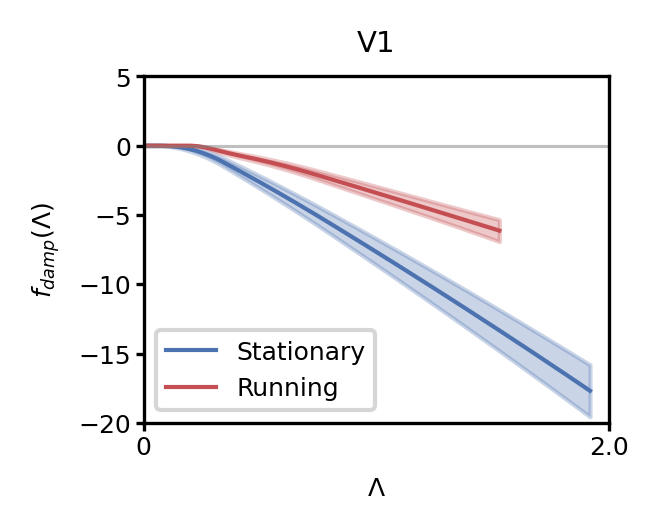

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(2,1.5), dpi=300)
transfer_ij = {4:0, 5:1, 0:2, 1:3, 2:4, 3:5}
xrange = [200, 100, 200, 70, 150, 100]

model_list = stationary_model_list + running_model_list

ii=0
i = transfer_ij[ii]

model = model_list[i]
utils.plot_ci(model.get_filter(ci=True)[7], center=True, color='b', label="Stationary")
plt.xlabel('$\Lambda$')
plt.ylim([-20, 5])
plt.xlim([0, 200])
plt.xticks([0, 100, 200], [0, 1, 2])
plt.title(utils.PROBE_CORRESPONDING[probe_list[i]]+"; Resting")

model = model_list[i+6]
utils.plot_ci(model.get_filter(ci=True)[7], center=True, color='r', label="Running")
plt.xlabel('$\Lambda$')
plt.ylabel('$f_{damp}(\Lambda)$')
plt.ylim([-20, 5])
plt.xlim([0, xrange[ii]])
plt.xticks([0, xrange[ii]], [0, xrange[ii]/100])
plt.title(utils.PROBE_CORRESPONDING[probe_list[i]])
plt.axhline(0, ls='-', color='grey', lw=0.75, alpha=0.5)
if ii == 0:
    plt.legend()

# plt.show()
plt.savefig('Figures/Model Explanation/f_damp_v1.pdf', format='pdf', dpi=300)

## <a id='toc2_4_'></a>[Load saved filters and output under null](#toc0_)

In [ ]:
# Load data from
server_names = ["merged", "hydra8.", "hydra9.", "hydra10", "hydra11", "hydra12", "hydra13"]

record_filter_unmerged = []
record_output_unmerged = []
for server_name in server_names:
    with open("not_tracking/75Null3basis/record_filter_null_"+server_name+".pickle", 'rb') as handle:
        record_filter_unmerged.append(pickle.load(handle))
    with open("not_tracking/75Null3basis/record_output_null_"+server_name+".pickle", 'rb') as handle:
        record_output_unmerged.append(pickle.load(handle))

record_filter_null = GLM.merge_dict_multi(record_filter_unmerged)
record_output_null = GLM.merge_dict_multi(record_output_unmerged)
del record_filter_unmerged, record_output_unmerged

In [ ]:
statistics_null_filter = GLM.get_excursion_statistic_from_dict(record_filter_null, method=method)
statistics_null_output = GLM.get_excursion_statistic_from_dict(record_output_null, method=method)
del record_filter_null, record_output_null

Processing records: 100%|██████████| 42/42 [07:25<00:00, 10.60s/it]


In [ ]:
# Number of samples
len(statistics_null_filter[0, 1])

82600

# <a id='toc3_'></a>[Filters and inference on filters](#toc0_)

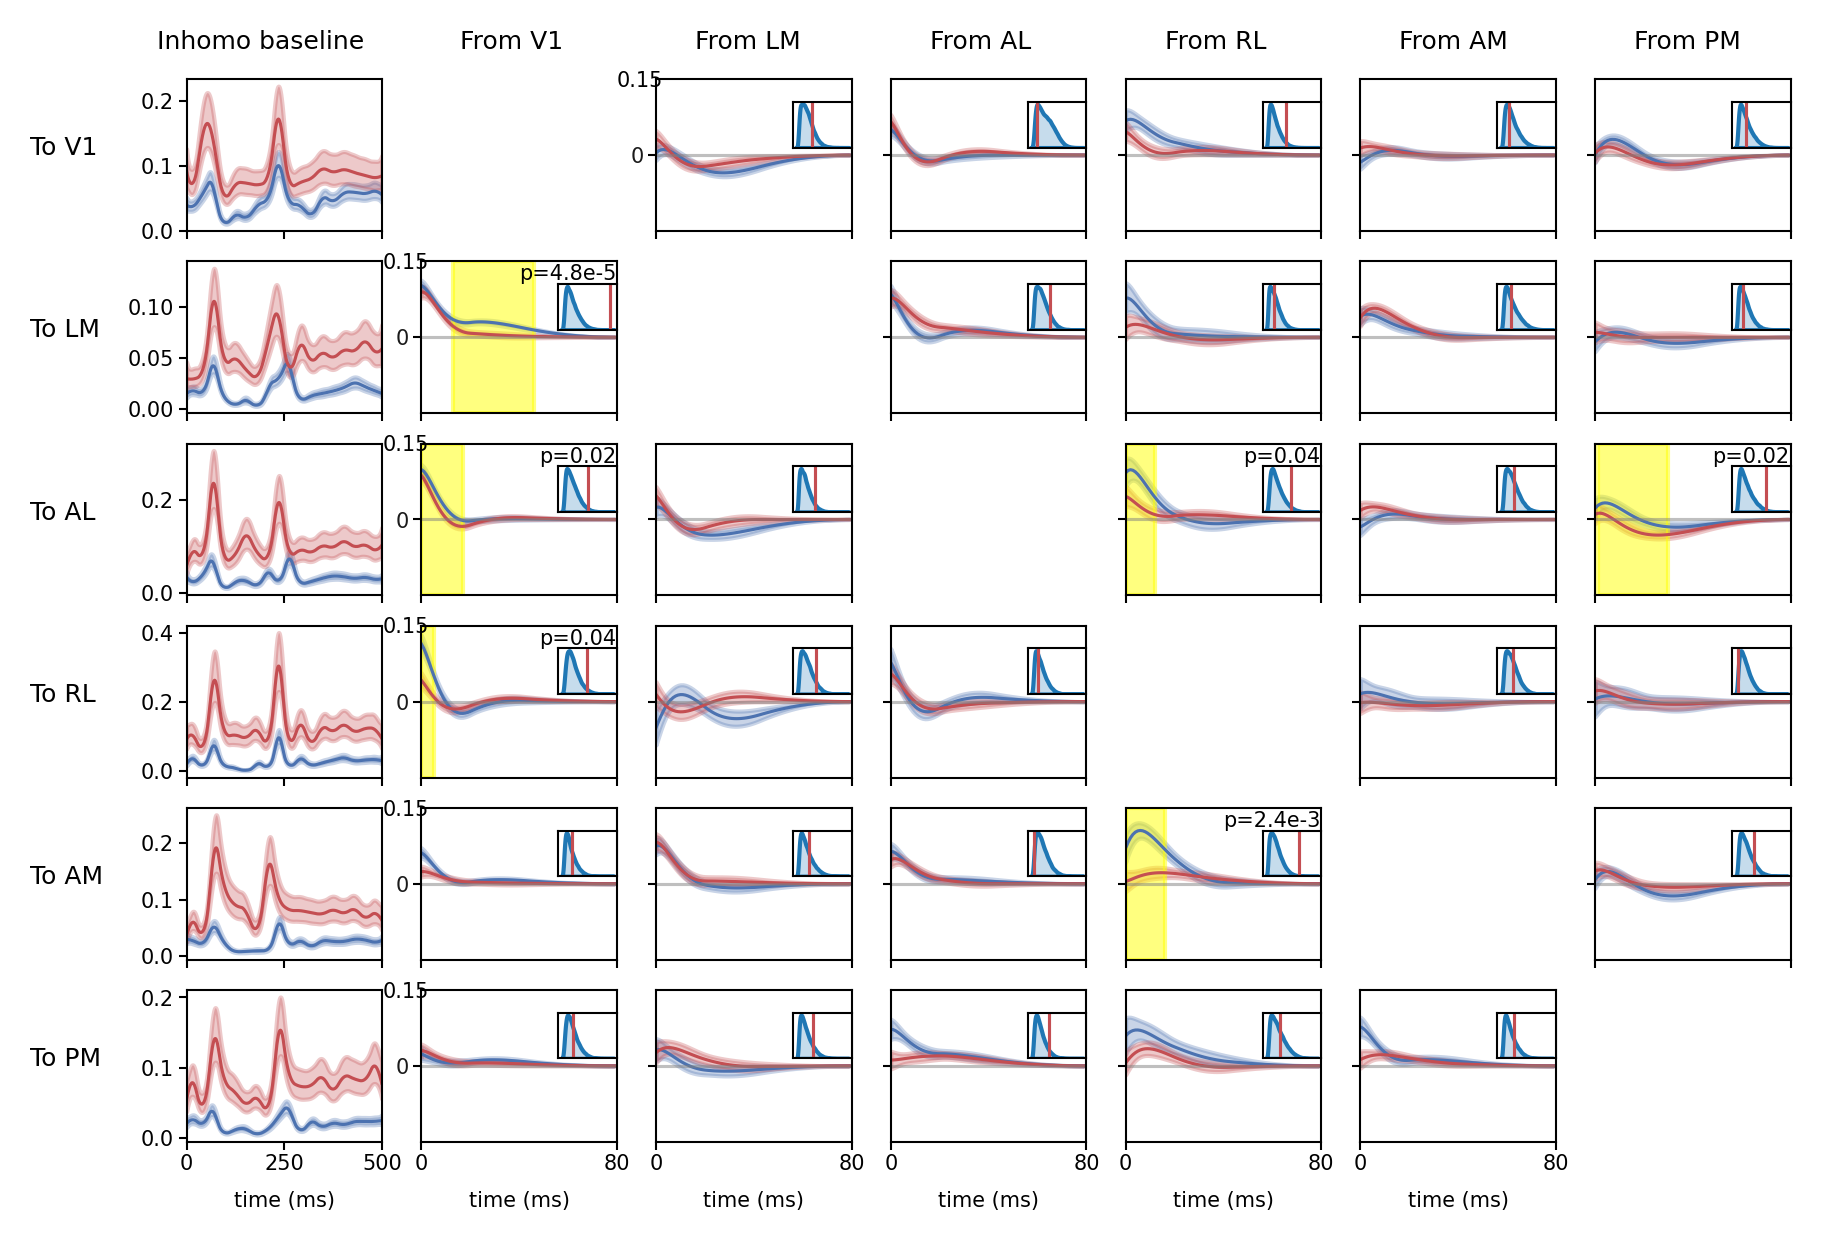

In [ ]:
# Plot with saved statistics before saving functions
GLM.plot_function_with_excursion(V1, stationary_filter, running_filter, 
                                 statistics_function=statistics_filter, 
                                 statistics_null_function=statistics_null_filter, 
                                 ROI_function=ROI_filter, 
                                 dpi=300,)
plt.savefig('Figures/Fitted Filters/fitted filters.pdf', format='pdf', dpi=300)

# <a id='toc4_'></a>[Output and inference on output](#toc0_)

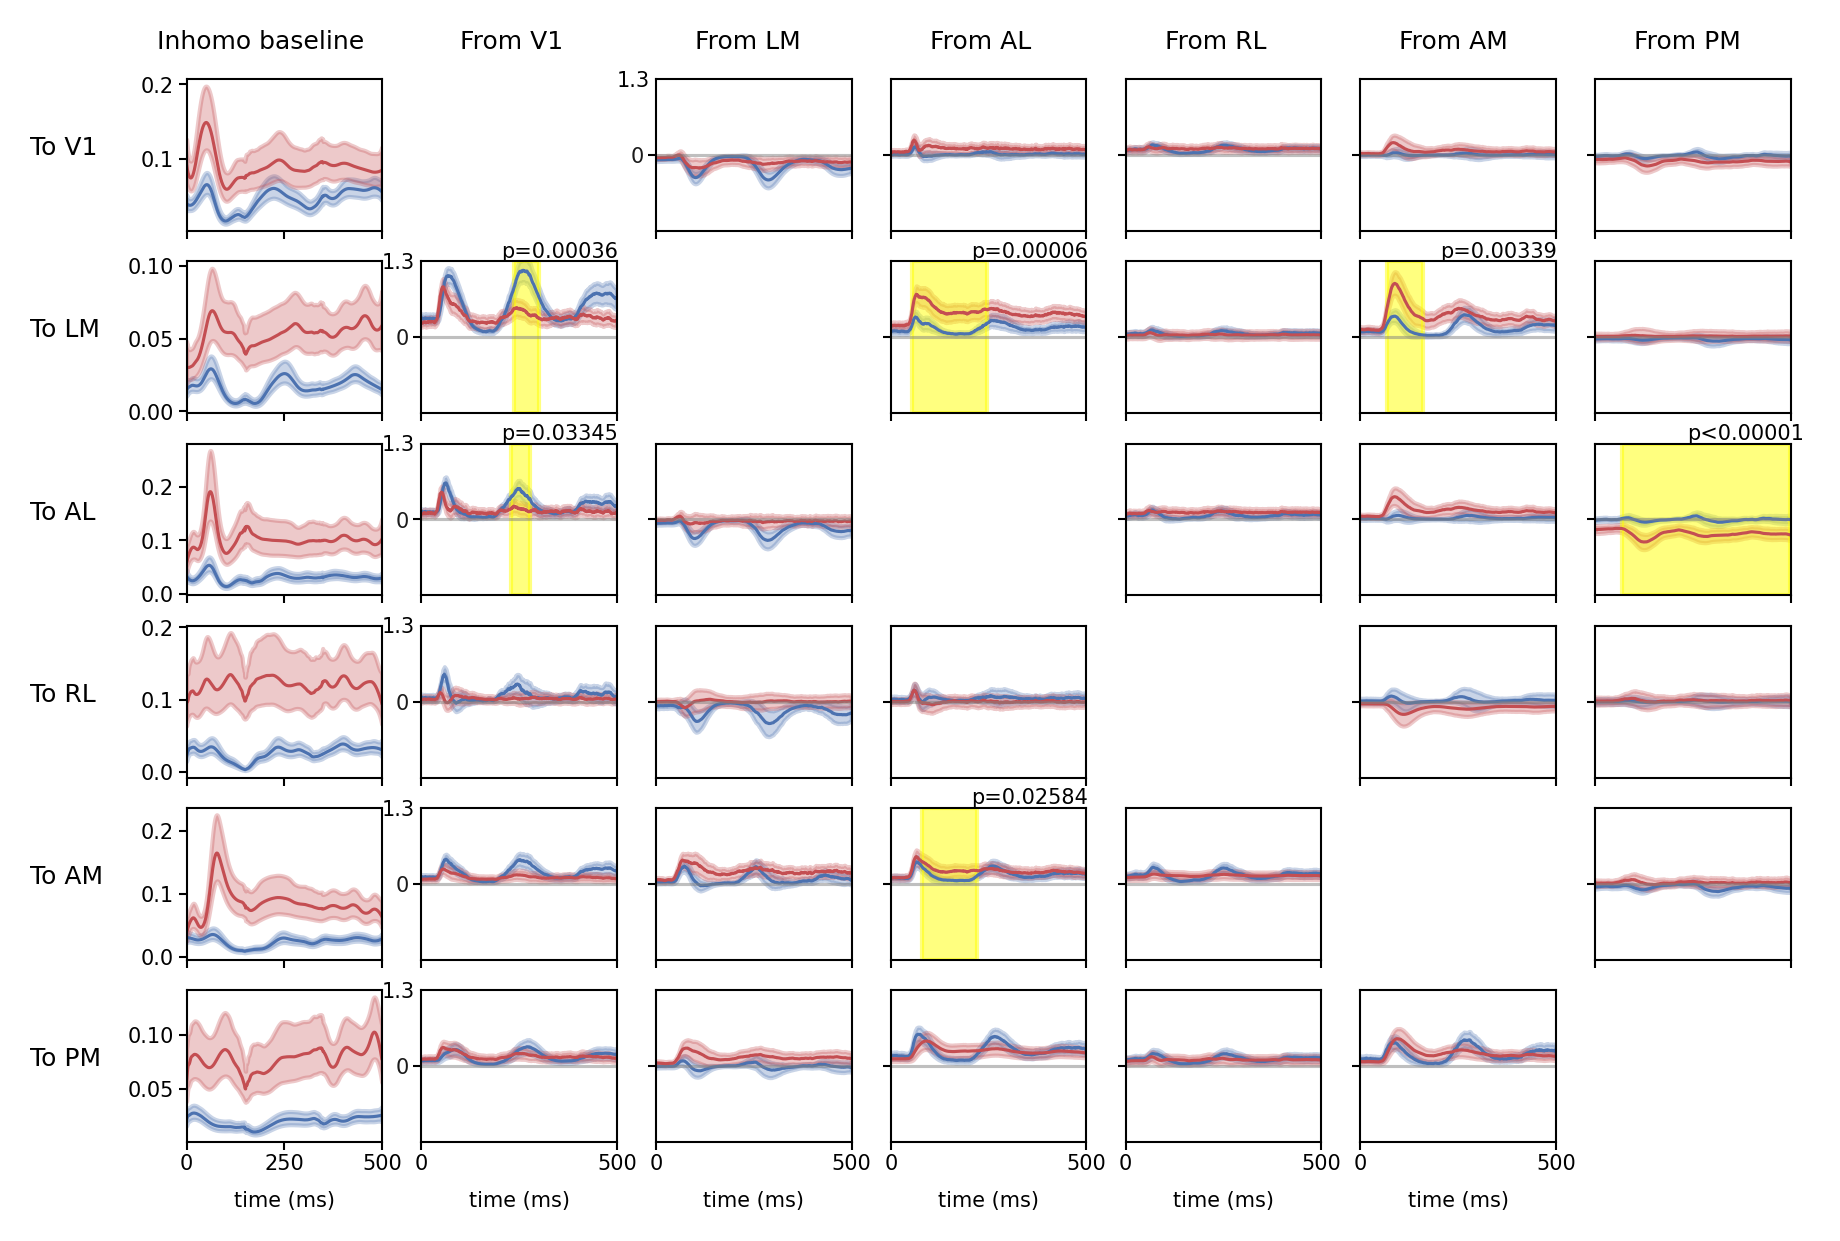

In [ ]:
GLM.plot_function_with_excursion(V1, stationary_output, running_output, 
                                 statistics_function=statistics_output, 
                                 statistics_null_function=statistics_null_output, 
                                 ROI_function=ROI_output,
                                 p_th=0.05,
                                 function_amp=1.3,
                                 plot_null_distribution=False,
                                 dpi=300,)
plt.savefig('Figures/Fitted Outputs/fitted outputs.pdf', format='pdf', dpi=300)

# <a id='toc5_'></a>[Mean firing rate (spikes per sec per neuron)](#toc0_)

/tmp/ipykernel_40080/539917944.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, ii+1)


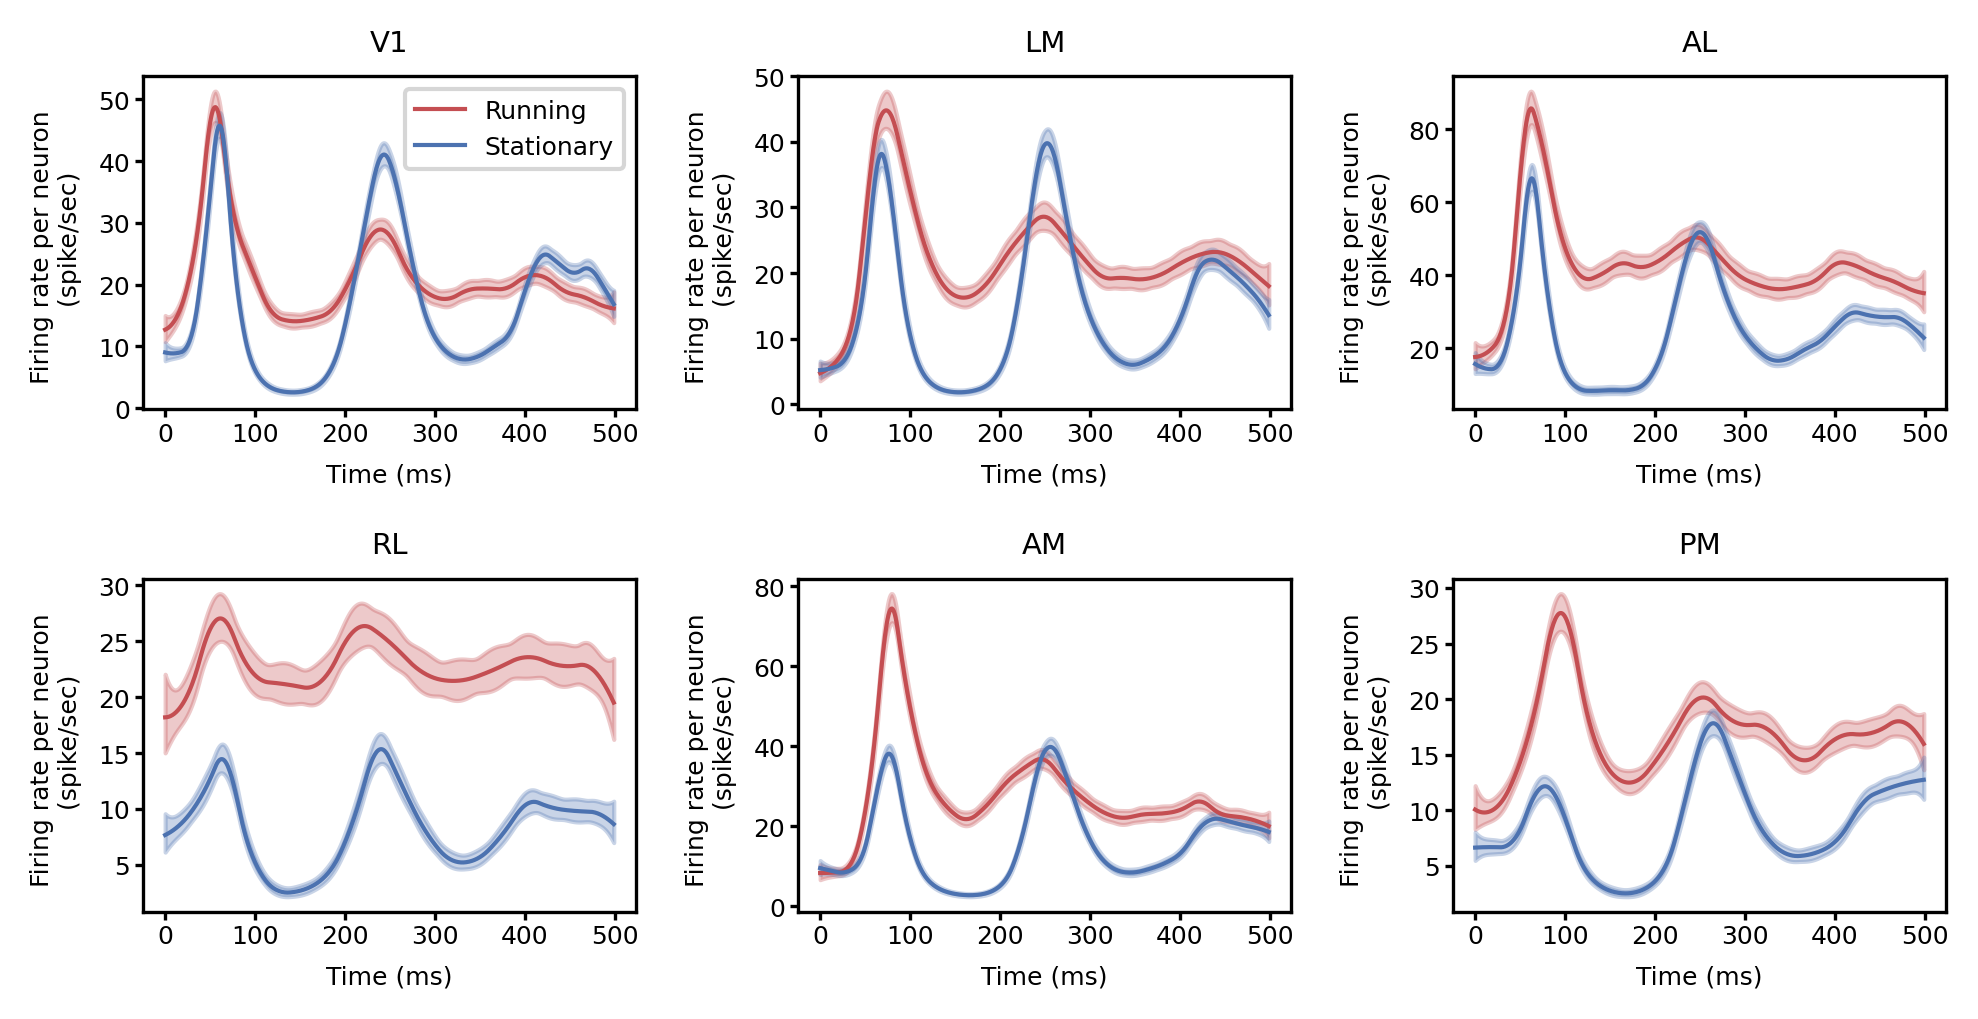

In [ ]:
smoothing = 1e5
penalty = 1e-3

utils.use_pdf_plot()
plt.subplots(figsize=(6.7,3.5),dpi=300)

transfer_ij = {4:0, 5:1, 0:2, 1:3, 2:4, 3:5}
num_basis_baseline1 = [25,25,25,25-10,25,25-10]
num_basis_baseline2 = [30,30,30,30-10,30,30-10]
probe_list = V1.selected_probes

for ii, target_probe in enumerate(probe_list):
    i = transfer_ij[ii]
    plt.subplot(2, 3, ii+1)
    
    select_trials = V1.running_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline1[ii], add_constant_basis=False)
    model.fit(probe_list[i], verbose=False, penalty=penalty, smoothing=smoothing)
    x = model.dataset.time_line*1e3
    y, ci = model.get_filter_output(ci=True, intermediate=False)[0]
    color = 'r'
    label = 'Running'
    plt.plot(x, np.exp(y.squeeze())*1e3/mean_num_neuron[i],label=label, color=color)
    plt.fill_between(x, np.exp(y-2*ci)*1e3/mean_num_neuron[i], np.exp(y+2*ci)*1e3/mean_num_neuron[i], 
                     color=color, alpha=.3)
#     plt.plot(x,1e3*utils.kernel_smoothing(model.output.mean(axis=1)[:, np.newaxis], std=15)/num_neuron[i],
#              label=label, color=color, linewidth=3)
    
    select_trials = V1.stationary_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline2[ii], add_constant_basis=False)
    model.fit(probe_list[i], verbose=False, penalty=penalty, smoothing=smoothing)
    x = model.dataset.time_line*1e3
    y, ci = model.get_filter_output(ci=True, intermediate=False)[0]
    color = 'b'
    label = 'Stationary'
    plt.plot(x, np.exp(y.squeeze())*1e3/mean_num_neuron[i],label=label, color=color)
    plt.fill_between(x, np.exp(y-2*ci)*1e3/mean_num_neuron[i], np.exp(y+2*ci)*1e3/mean_num_neuron[i],
                     color=color, alpha=.3)
#     plt.plot(x,1e3*utils.kernel_smoothing(model.output.mean(axis=1)[:, np.newaxis], std=15)/num_neuron[i],
#              label=label, color=color, linewidth=3)
    plt.xlabel('Time (ms)')
    plt.ylabel('Firing rate per neuron \n (spike/sec)')

    if ii==0:
        plt.legend()
    plt.title(utils.PROBE_CORRESPONDING[probe_list[i]])
    
plt.tight_layout()
plt.savefig('Figures/Mean Firing Rate/mean firing rate.pdf', format='pdf', dpi=300)


# <a id='toc6_'></a>[Template firing rate](#toc0_)

0it [00:00, ?it/s]/tmp/ipykernel_12079/3234998573.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, ii+1)
6it [01:47, 17.86s/it]


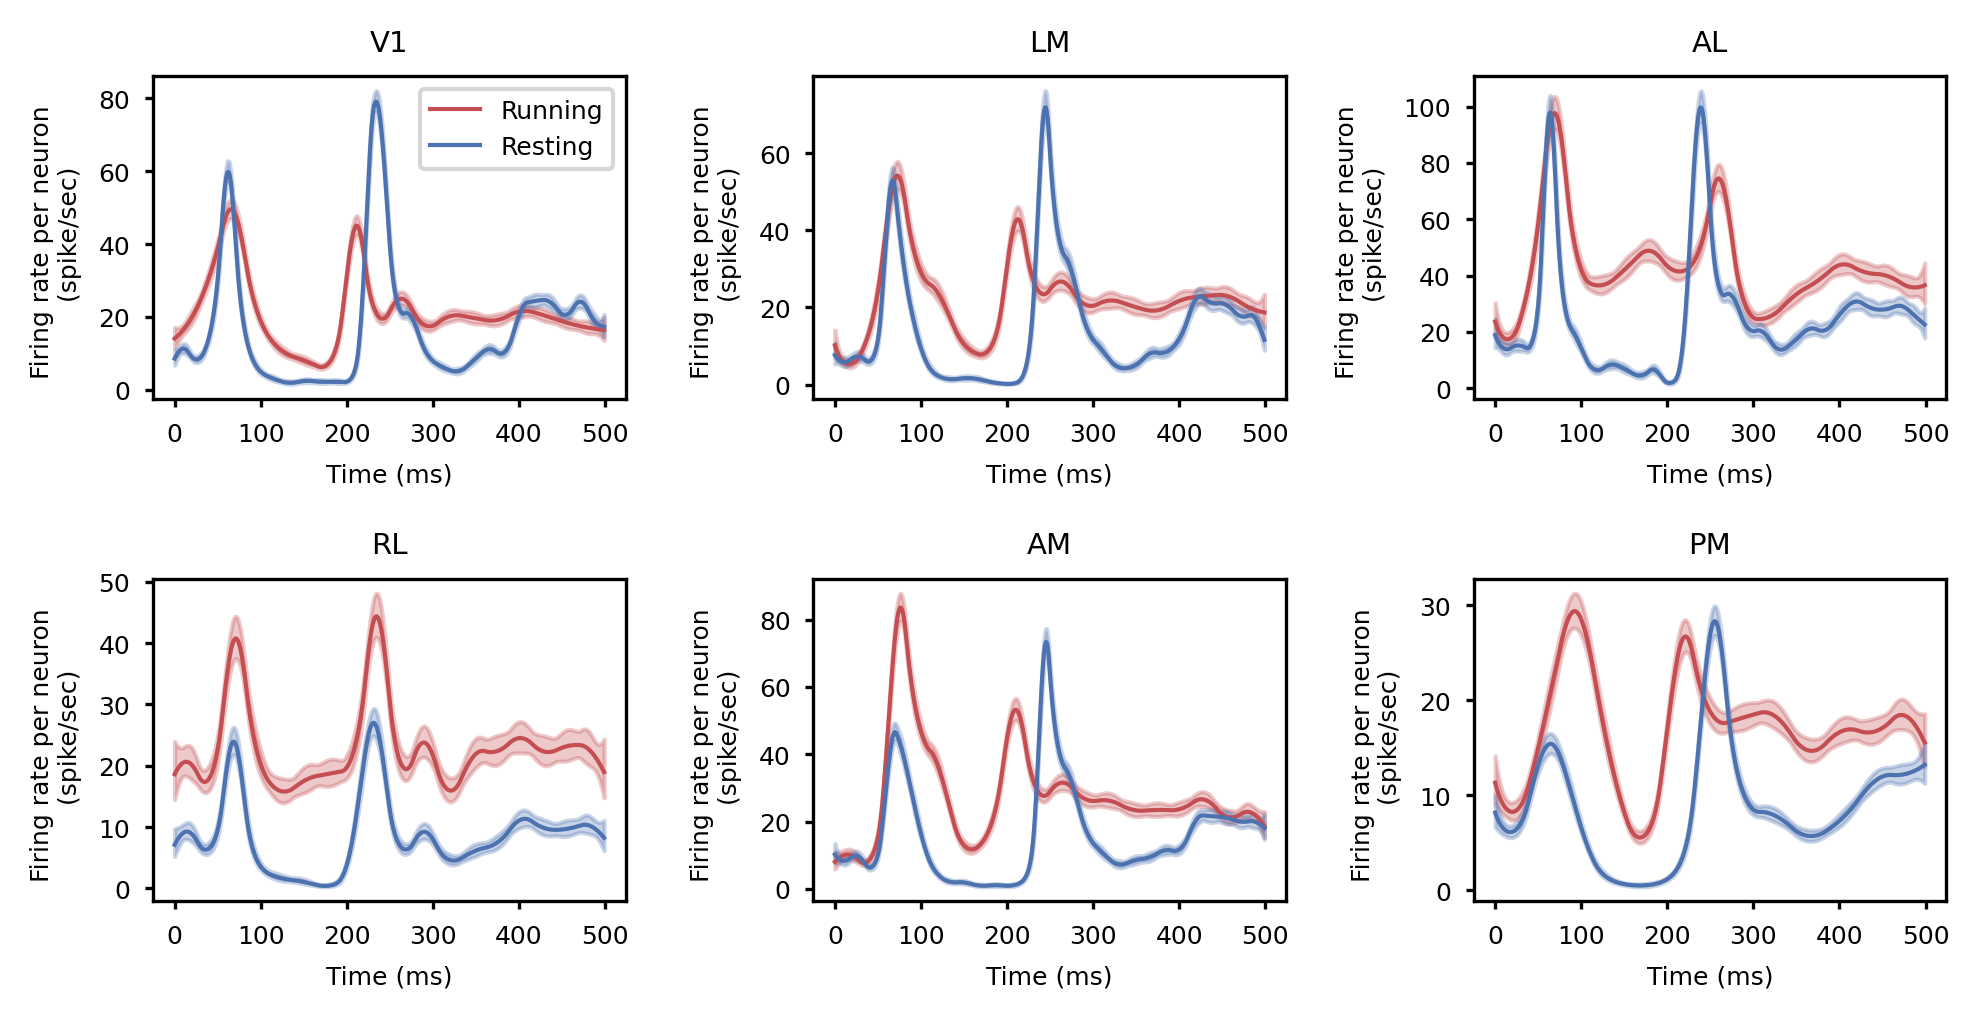

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(6.7,3.5),dpi=300)

transfer_ij = {4:0, 5:1, 0:2, 1:3, 2:4, 3:5}
num = 25
max_iter1 = [10,10,5,10,10,10]
max_iter2 = [10,10,5,10,10,10]
num_basis_baseline1 = [20,20,20,20,20,15]
num_basis_baseline2 = [30,30,30,30-10,30,30-15]
# num_basis_baseline1 = [20,20,20,25-15,20,25-10]
# num_basis_baseline2 = [25,25,25,30-10,25,30-10]

probe_list = V1.selected_probes

for ii, target_probe in tqdm(enumerate(probe_list)):
    i = transfer_ij[ii]
    plt.subplot(2, 3, ii+1)
    
    select_trials = V1.running_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline1[ii], add_constant_basis=False)
    model.fit_time_warping_baseline(probe_list[i], verbose=False, max_iter=max_iter1[ii], penalty=1e0)
    x = model.dataset.time_line*1e3
    y, ci = model.get_filter(ci=True)[0]
    color = 'r'
    label = 'Running'
    plt.plot(x, np.exp(y.squeeze())*1e3/mean_num_neuron[i],label=label, color=color)
    plt.fill_between(x, np.exp(y-2*ci)*1e3/mean_num_neuron[i], np.exp(y+2*ci)*1e3/mean_num_neuron[i], 
                     color=color, alpha=.3)
#     plt.plot(x,1e3*utils.kernel_smoothing(model.output.mean(axis=1)[:, np.newaxis], std=15)/num_neuron[i],
#              label=label, color=color, linewidth=3)
    
    select_trials = V1.stationary_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline2[ii], add_constant_basis=False)
    model.fit_time_warping_baseline(probe_list[i], verbose=False, max_iter=max_iter2[ii], penalty=1e0)
    x = model.dataset.time_line*1e3
    y, ci = model.get_filter(ci=True)[0]
    color = 'b'
    label = 'Resting'
    plt.plot(x, np.exp(y.squeeze())*1e3/mean_num_neuron[i],label=label, color=color)
    plt.fill_between(x, np.exp(y-2*ci)*1e3/mean_num_neuron[i], np.exp(y+2*ci)*1e3/mean_num_neuron[i],
                     color=color, alpha=.3)
#     plt.plot(x,1e3*utils.kernel_smoothing(model.output.mean(axis=1)[:, np.newaxis], std=15)/num_neuron[i],
#              label=label, color=color, linewidth=3)
    plt.xlabel('Time (ms)')
    plt.ylabel('Firing rate per neuron \n (spike/sec)')

    if ii==0:
        plt.legend()
    plt.title(utils.PROBE_CORRESPONDING[probe_list[i]])
    
plt.tight_layout()
plt.savefig('Figures/SupFig/Inhomo only.pdf', format='pdf', dpi=300)
plt.show()

# <a id='toc7_'></a>[Basis and illustration of excursion test](#toc0_)

/tmp/ipykernel_34722/191082186.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


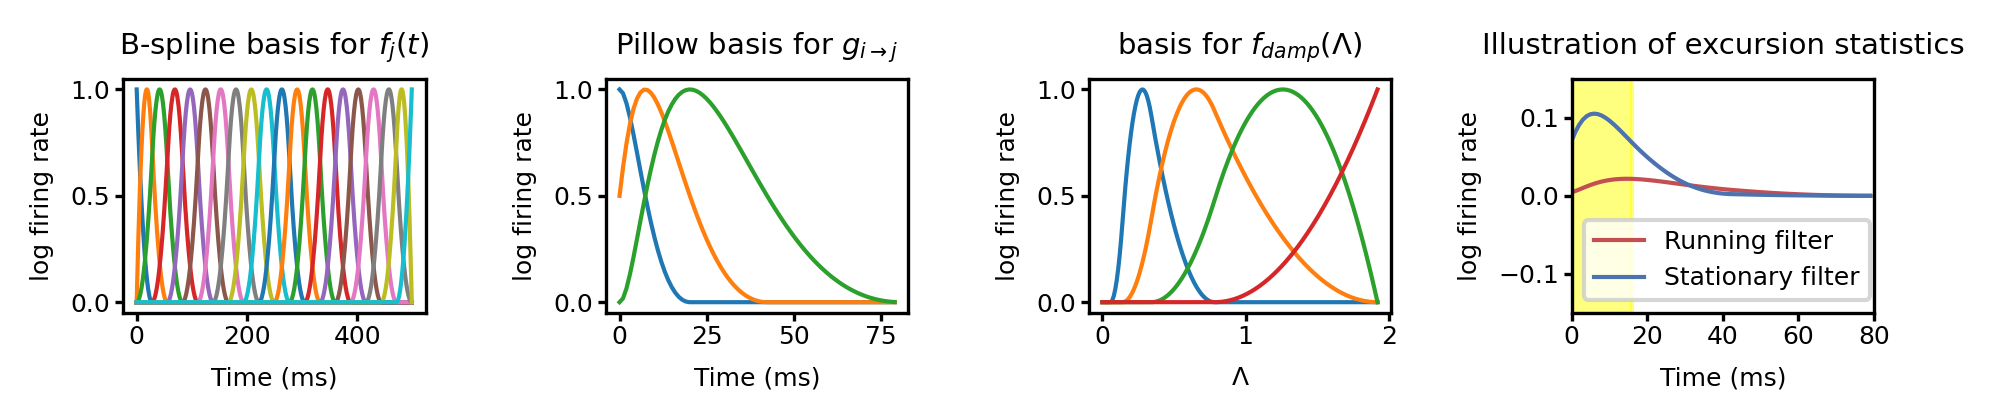

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(6.5,1.5), dpi=300)
model_list = stationary_model_list + running_model_list

plt.subplot(1,4,1)
plt.plot(np.arange(model_list[2].basis_list[0].shape[0])*1, model_list[2].basis_list[0])
plt.xlabel('Time (ms)')
plt.ylabel('log firing rate')
plt.title('B-spline basis for $f_j(t)$')

plt.subplot(1,4,2)
plt.plot(np.arange(model_list[2].basis_list[1].shape[0])*1, model_list[2].basis_list[1])
plt.xlabel('Time (ms)')
plt.ylabel('log firing rate')
plt.title(r'Pillow basis for $g_{i \rightarrow j}$')

plt.subplot(1,4,3)
plt.plot(np.arange(model_list[2].basis_list[7].shape[0])*1e-2, model_list[2].basis_list[7])
plt.xlabel('$\Lambda$')
plt.ylabel('log firing rate')
plt.xticks([0, 1, 2], [0, 1, 2])
plt.title('basis for $f_{damp}(\Lambda)$')

plt.subplot(1,4,4)
i, j = 4,3
filter_amp = 0.15
i_plot = transfer_ij[i]
j_plot = transfer_ij[j]
filter_length = 80
fontsize = 15
filter_index = i_plot,j_plot
#         print(filter_index)
y, ci = running_filter[filter_index]
x = np.arange(y.shape[0])
plt.plot(x, y,label='Running filter', color='r')
y, ci = stationary_filter[filter_index]
x = np.arange(y.shape[0])
plt.plot(x, y,label='Stationary filter', color='b')
for temp in ROI_filter[filter_index]:
    x = np.array([temp.min(), temp.max()])
    plt.fill_between(x, np.array([-filter_amp,-filter_amp]), np.array([filter_amp,filter_amp]), \
                     color='yellow', alpha=.5)
plt.title("Illustration of excursion statistics")
plt.ylim([-filter_amp, filter_amp])
plt.xlim([0, filter_length])
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('log firing rate')

plt.tight_layout()
# plt.show()
plt.savefig('Figures/SupFig/Basis.pdf', format='pdf', dpi=300)

Text(0, 0.5, 'log firing rate')

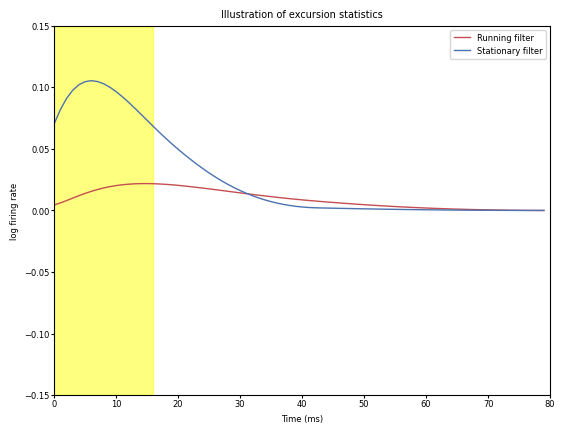

In [ ]:


i, j = 4,3
filter_amp = 0.15
i_plot = transfer_ij[i]
j_plot = transfer_ij[j]
filter_length = 80
fontsize = 15
filter_index = i_plot,j_plot
#         print(filter_index)
y, ci = running_filter[filter_index]
x = np.arange(y.shape[0])
plt.plot(x, y,label='Running filter', color='r')
y, ci = stationary_filter[filter_index]
x = np.arange(y.shape[0])
plt.plot(x, y,label='Stationary filter', color='b')
for temp in ROI_filter[filter_index]:
    x = np.array([temp.min(), temp.max()])
    plt.fill_between(x, np.array([-filter_amp,-filter_amp]), np.array([filter_amp,filter_amp]), \
                     color='yellow', alpha=.5)
plt.title("Illustration of excursion statistics")
plt.ylim([-filter_amp, filter_amp])
plt.xlim([0, filter_length])
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('log firing rate')

# <a id='toc8_'></a>[Mean outputs from all trials in one plot](#toc0_)

In [ ]:
# The following hyperparameters turned out to be the best
num_f_refractory = 4
max_iter = 10
tau = 15
coupling_filter_params = {'peaks_max':20.2, 'num':3, 'nonlinear':0.5}
num_basis_baseline = 20
penalty = 5e-1

################ No need to change below
probe_list = V1.selected_probes
running_filter = {}
stationary_filter = {}
running_output = {}
stationary_output = {}

ROI_filter = {}
statistics_filter = {}
ROI_output = {}
statistics_output = {}

running_model_list = []
stationary_model_list = []

for i, target_probe in tqdm(enumerate(probe_list)):
    select_trials = V1.running_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j], apply_no_penalty=True, **coupling_filter_params)
    # model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
#     model.add_effect('refractory', target_probe, tau=tau, order=1.5, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    running_model_list.append(model)
    
    filter_list = model.get_filter(ci=True)
    for j in range(len(model.basis_list)):
        running_filter[i,j-1] = filter_list[j]
    output_list = model.get_filter_output(intermediate=False, ci=True)
    for j in range(len(model.basis_list)):
        running_output[i,j-1] = output_list[j]
    
    select_trials = V1.stationary_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j],apply_no_penalty=True, **coupling_filter_params)
    # model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
#     model.add_effect('refractory', target_probe, tau=tau, order=1.5, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    stationary_model_list.append(model)
    
    filter_list = model.get_filter(ci=True)
    for j in range(len(model.basis_list)):
        stationary_filter[i,j-1] = filter_list[j]
    output_list = model.get_filter_output(intermediate=False, ci=True)
    for j in range(len(model.basis_list)):
        stationary_output[i,j-1] = output_list[j]
    
aic = np.sum([model.aic for model in stationary_model_list]+[model.aic for model in running_model_list])
baseline_aic = 570714.232742189
print(f"AIC improvement of the model is: {(baseline_aic - aic)}")

bic = np.sum([model.bic for model in stationary_model_list]+[model.bic for model in running_model_list])
baseline_bic = 588924.4932276756
print(f"BIC improvement of the model is: {(baseline_bic - bic)}")

6it [03:13, 32.31s/it]

AIC improvement of the model is: -78.29812465317082
BIC improvement of the model is: 2892.5261383344186


In [ ]:
stationary_model_list[3].basis_name

['time_warping_inhomogeneous_baseline',
 'coupling from AM',
 'coupling from PM',
 'coupling from V1',
 'coupling from LM',
 'coupling from AL',
 'coupling from RL',
 'refractory_additive',
 'trial_coef']

In [ ]:
to_look_at = 1
import copy
model = stationary_model_list[transfer_ij[to_look_at]]
outputs = []
for ii in range(9):
    if ii>=1 and ii<=6:
        i = transfer_ij[ii-1]
        i += 1
    else:
        i = ii
    outputs.append( model.get_filter_output(ci=False)[i]) 

outputs[to_look_at+1] += outputs[7]
outputs[0] += outputs[8]

total_output = copy.deepcopy( outputs[0] )
for i in range(1, 7):
    total_output += outputs[i]


/tmp/ipykernel_52310/3464256568.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


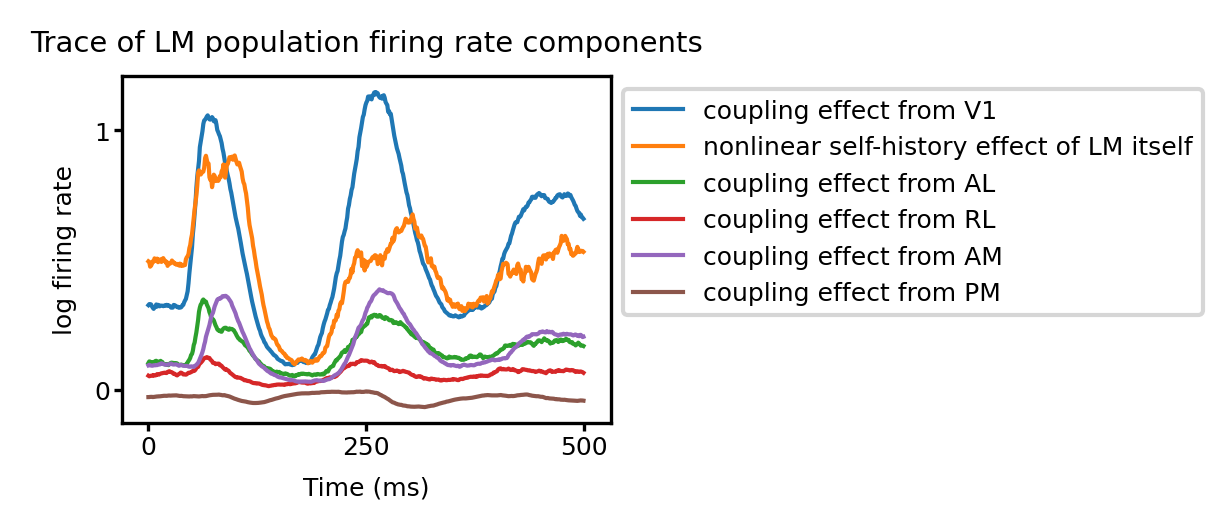

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(2.1,1.5), dpi=300)

# plt.plot(total_output[:,trial], label='total')
for i in range(1,7):
    output = outputs[i]
    plt.plot(output)

plt.legend([
            # 'total firing rate of LM (sum of all effects below)', 
            # 'time-warped inhomogeneous baseline \n+ trial-wise gain constant', 
            'coupling effect from V1', 
            'nonlinear self-history effect of LM itself', 
            'coupling effect from AL',
            'coupling effect from RL',
            'coupling effect from AM',
            'coupling effect from PM',
            ],bbox_to_anchor=(1, 1))
plt.xlim([-30, 530])
# plt.ylim([-0.1, 1.3])
plt.xticks([0, 250, 500], [0, 250, 500])
plt.yticks([0,1], [0,1])
plt.ylabel('log firing rate')
plt.xlabel('Time (ms)')
plt.title('Trace of LM population firing rate components')
plt.tight_layout()
plt.savefig('Figures/Trace/Average trace.pdf', format='pdf', dpi=300)
plt.show()

In [ ]:
to_look_at = 1
import copy
model = running_model_list[transfer_ij[to_look_at]]
outputs = []
for ii in range(9):
    if ii>=1 and ii<=6:
        i = transfer_ij[ii-1]
        i += 1
    else:
        i = ii
    outputs.append( model.get_filter_output(ci=False)[i]) 

outputs[to_look_at+1] += 0.2*outputs[7]
outputs[0] += outputs[8]

total_output = copy.deepcopy( outputs[0] )
for i in range(1, 7):
    total_output += outputs[i]


/tmp/ipykernel_52310/716197074.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


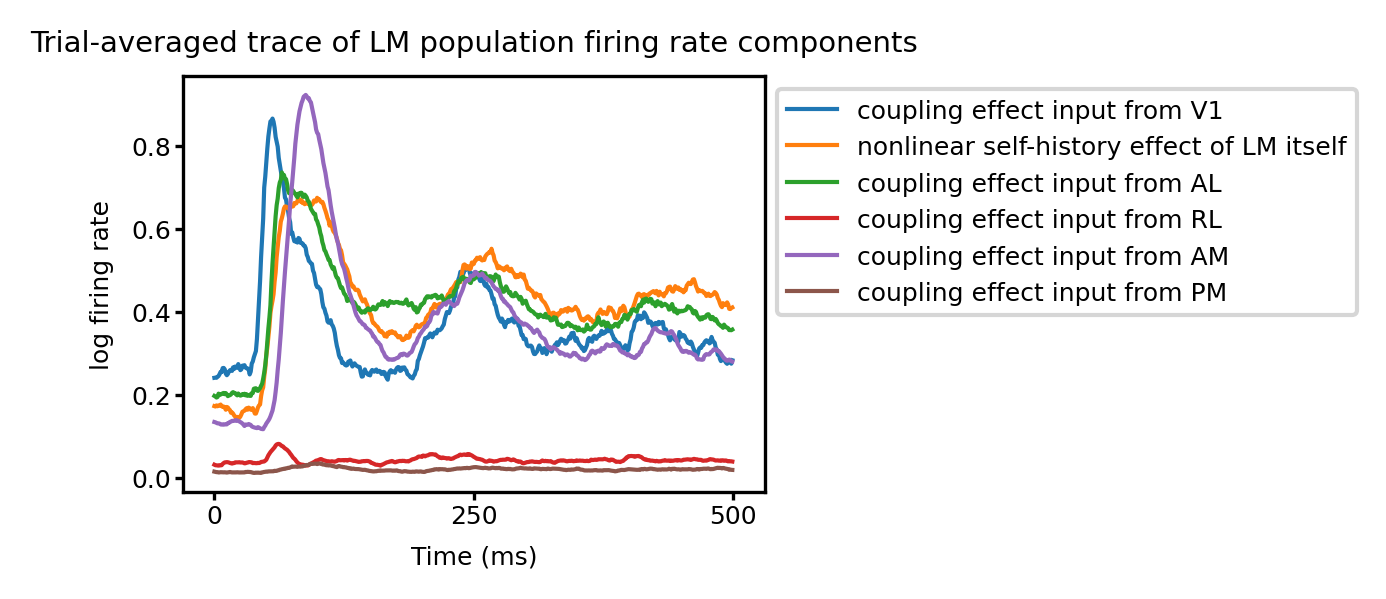

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(2.5,1.8), dpi=300)

# plt.plot(total_output[:,trial], label='total')
for i in range(1,7):
    output = outputs[i]
    plt.plot( output)

plt.legend([
            # 'total firing rate of LM (sum of all effects below)', 
            # 'time-warped inhomogeneous baseline \n+ trial-wise gain constant', 
            'coupling effect input from V1', 
            'nonlinear self-history effect of LM itself', 
            'coupling effect input from AL',
            'coupling effect input from RL',
            'coupling effect input from AM',
            'coupling effect input from PM',
            ], bbox_to_anchor=(1, 1))
plt.xlim([-30, 530])
# plt.ylim([-0.25, 2.25])
plt.xticks([0, 250, 500], [0, 250, 500])
plt.ylabel('log firing rate')
plt.xlabel('Time (ms)')
plt.title('Trial-averaged trace of LM population firing rate components')
plt.tight_layout()
# plt.savefig('Figures/Single_trace.pdf', format='pdf', dpi=300)
plt.show()

# Modeling LM population as EIF neuron

In [ ]:
# Get trial-wise inputs

transfer_ij = {4:0, 5:1, 0:2, 1:3, 2:4, 3:5}
to_look_at = 1
import copy
model = stationary_model_list[transfer_ij[to_look_at]]
outputs = []
for ii in range(9):
    if ii>=1 and ii<=6:
        i = transfer_ij[ii-1]
        i += 1
    else:
        i = ii
    outputs.append( model.get_filter_output(trial_wise=True, ci=False)[i].\
                   reshape((model.nt, model.ntrial), order='F')  )

outputs[to_look_at+1] += outputs[7]
outputs[0] += outputs[8]

total_output = copy.deepcopy( outputs[0] )
for i in range(1, 7):
    total_output += outputs[i]


In [ ]:
# I'm only simulating LM population. There are recurrent connection within LM population, 
# and feedforward connection from other areas to LM.

########### Only tune this parameters
conn = 0.038
noise_amp = 0.7
I_ext_max = 0.08
I_ext_min = -0.0
###########

ntrial = outputs[0].shape[1]
nneuron = 10
dt = 0.1
ndt = int(1/dt)
padding = 50
nt = (500)*ndt
padding = 50
npadding = padding*ndt
nt_tot = nt + npadding

total_output = np.zeros_like(outputs[0])
for i, output in enumerate(outputs[:7]):
    if i==to_look_at+1:
        continue
    total_output += output
    
avg_output = np.mean(total_output, axis=1)
rescaled_output = (total_output - np.min(avg_output)) / (np.max(avg_output) - np.min(avg_output)) * (I_ext_max - I_ext_min) + I_ext_min
I_ext = np.ones((550, nneuron, ntrial))*rescaled_output[0,:][np.newaxis, np.newaxis, :]
I_ext[padding:, :, :] = np.repeat(rescaled_output[:, np.newaxis, :], nneuron, axis=1)

J = conn*np.ones((nneuron, nneuron)) # From row i to column j

# Unit: mV or ms
tau = 15
EL = -60
VT = -50
Vth = -10
Vre = -65
DltT = 2
tau_ref = 1
tau_d = 5
tau_r = 1

nsyn_func = 3*tau_d*ndt
syn_time_line = np.arange(nsyn_func)
syn_func = (np.exp(-syn_time_line*dt/tau_d)-np.exp(-syn_time_line*dt/tau_r))[:, np.newaxis]
ntau_ref = tau_ref*ndt
V_rcd = np.zeros((nt_tot, nneuron, ntrial))
I_rcd = np.zeros((nt_tot+nsyn_func+1, nneuron, ntrial))
spikes_rcd = np.zeros((nt_tot, nneuron, ntrial))

for itrial in tqdm(range(ntrial)):
    V = Vre*np.ones((nt_tot, nneuron))
    I_syn = np.zeros((nt_tot+nsyn_func+1, nneuron))
    spikes = np.zeros((nt_tot, nneuron))

    for t in range(1, nt_tot):

        I_leak = -dt/tau*(V[t-1,:]-EL) + dt/tau*DltT*np.exp((V[t-1,:]-VT)/DltT)
        I_noise = np.random.normal(0, noise_amp**2, nneuron)
        dV = I_leak + I_noise + I_syn[t,:] + I_ext[t//ndt,:,itrial]
        V[t,:] = V[t-1,:] + dV

        spikes[t,:] = (V[t,:]>=Vth).astype(int)
        I_syn[(t+1):(t+nsyn_func+1),:] += spikes[t:(t+1),:]@J*syn_func

        in_ref = ((spikes[max(0,t-ntau_ref):(t+1),:].sum(axis=0))>0).astype(int)
        V[t,:] += in_ref*(Vre-V[t,:])

    V_rcd[:,:,itrial] = V
    I_rcd[:,:,itrial] = I_syn
    spikes_rcd[:,:,itrial] = spikes

spikes_rcd = spikes_rcd.reshape((int(nt_tot/ndt),ndt,nneuron,ntrial), order='C').sum(axis=1)



  0%|          | 0/129 [00:00<?, ?it/s]

100%|██████████| 129/129 [00:23<00:00,  5.41it/s]


/tmp/ipykernel_52310/1756539370.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


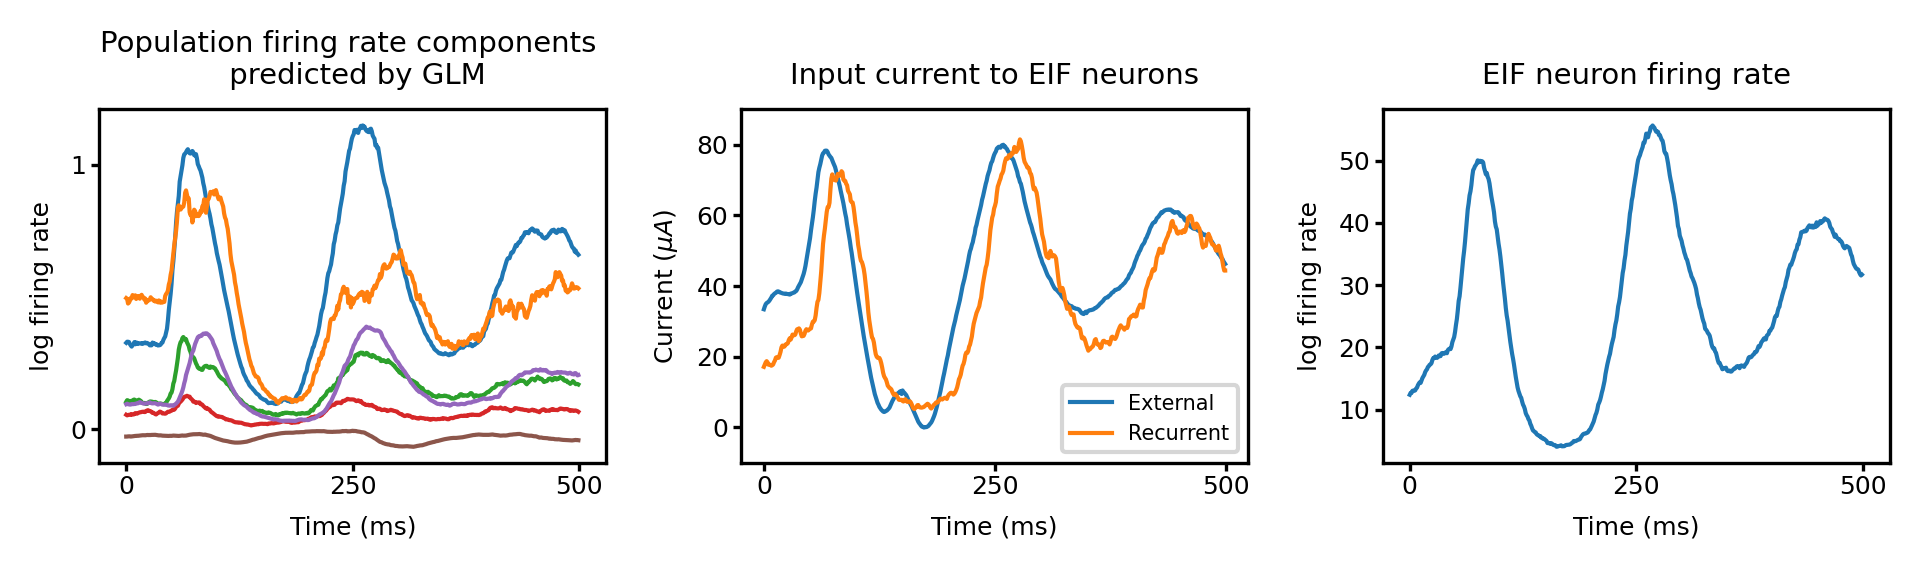

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(6.5,2), dpi=300)


plt.subplot(1,3,1)
for i in range(1,7):
    output = outputs[i]
    plt.plot(output)

# plt.legend([
#             # 'total firing rate of LM (sum of all effects below)', 
#             # 'time-warped inhomogeneous baseline \n+ trial-wise gain constant', 
#             'coupling effect from V1', 
#             'nonlinear self-history effect of LM itself', 
#             'coupling effect from AL',
#             'coupling effect from RL',
#             'coupling effect from AM',
#             'coupling effect from PM',
#             ],bbox_to_anchor=(1, 1))
plt.xlim([-30, 530])
# plt.ylim([-0.1, 1.3])
plt.xticks([0, 250, 500], [0, 250, 500])
plt.yticks([0,1], [0,1])
plt.ylabel('log firing rate')
plt.xlabel('Time (ms)')
plt.title('Population firing rate components \n predicted by GLM')

plt.subplot(1,3,2)
plt.plot(1e3*I_ext.mean(axis=(1,2))[50:], label='External')
I_rcd_mean = np.mean(I_rcd[-5500-nsyn_func:-nsyn_func,:,:].reshape((int(nt_tot/ndt),ndt,nneuron,ntrial), order='C'), axis=1)
plt.plot(1e3*I_rcd_mean.mean(axis=(1,2))[50:], label='Recurrent')
plt.title(f'Input current to EIF neurons')
plt.legend(fontsize=5, loc=4)
plt.ylabel('Current ($\mu A$)')
plt.xlabel('Time (ms)')
plt.xticks([0, 250, 500], [0, 250, 500])
plt.ylim([-10, 90])

plt.subplot(1,3,3)
plt.plot(1e3*utils.kernel_smoothing(spikes_rcd.mean(axis=(1,2))[50:, np.newaxis], std=10), label='Simulated')
# i = 3
# plt.plot(1e3/mean_num_neuron[i]*utils.kernel_smoothing(stationary_model_list[i].output.mean(axis=1)[:, np.newaxis], std=10), label='Experimental')

# plt.legend()

plt.xlim([-30, 530])
# plt.ylim([-0.25, 2.4])
plt.xticks([0, 250, 500], [0, 250, 500])
plt.ylabel('log firing rate')
plt.xlabel('Time (ms)')
plt.title('EIF neuron firing rate')
plt.tight_layout()
plt.savefig('Figures/Trace/EIF.pdf', format='pdf', dpi=300)

plt.show()


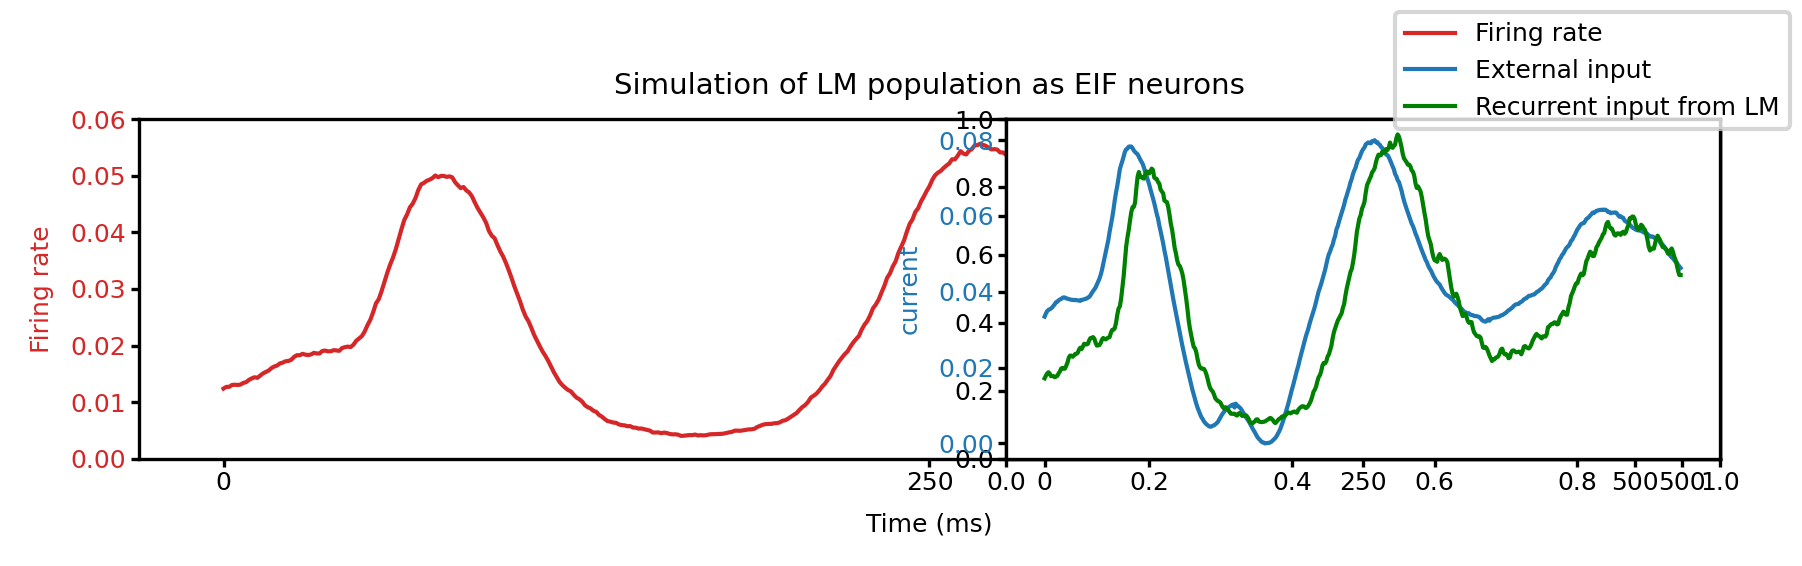

In [ ]:
utils.use_pdf_plot()
fig, ax1 = plt.subplots(figsize=(3,2), dpi=300)

color = 'tab:red'
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Firing rate', color=color)
ax1.plot(utils.kernel_smoothing(spikes_rcd.mean(axis=(1,2))[50:, np.newaxis], std=10), color=color, label='Firing rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim([-30, 530])
ax1.set_ylim([0 , 0.06])
ax1.set_xticks([0, 250, 500])
ax1.set_xticklabels([0, 250, 500])
ax1.set_title('Simulation of LM population as EIF neurons')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('current', color=color)  # we already handled the x-label with ax1
ax2.plot(I_ext.mean(axis=(1,2))[50:], color=color, label='External input')
I_rcd_mean = np.mean(I_rcd[-5500-nsyn_func:-nsyn_func,:,:].reshape((int(nt_tot/ndt),ndt,nneuron,ntrial), order='C'), axis=1)
ax2.plot(I_rcd_mean.mean(axis=(1,2))[50:], color='green', label='Recurrent input from LM')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim([-30, 530])
ax2.set_xticks([0, 250, 500])
ax2.set_xticklabels([0, 250, 500])
# 
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend()
# plt.savefig('Figures/Average trace.pdf', format='pdf', dpi=300)
plt.show()

# <a id='toc9_'></a>[Plot all effect's output in an example trial](#toc0_)

In [ ]:
to_look_at = 1
import copy
model = stationary_model_list[transfer_ij[to_look_at]]
outputs = []
for ii in range(9):
    if ii>=1 and ii<=6:
        i = transfer_ij[ii-1]
        i += 1
    else:
        i = ii
    outputs.append( model.get_filter_output(trial_wise=True, ci=False)[i].\
                   reshape((model.nt, model.ntrial), order='F')  )

outputs[to_look_at+1] += outputs[7]
outputs[0] += outputs[8]

total_output = copy.deepcopy( outputs[0] )
for i in range(1, 7):
    total_output += outputs[i]


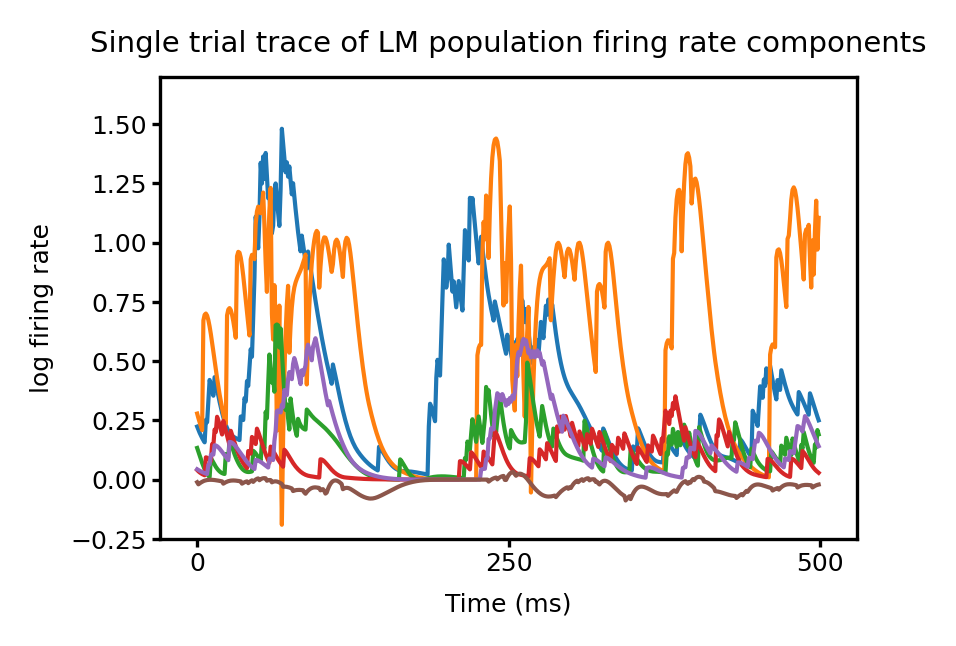

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(3,2), dpi=300)

trial = 2

# plt.plot(total_output[:,trial], label='total')
for i in range(1,7):
    output = outputs[i]
    plt.plot( output[:,trial])

# plt.legend([
#             # 'total firing rate of LM (sum of all effects below)', 
#             # 'time-warped inhomogeneous baseline \n+ trial-wise gain constant', 
#             'coupling effect input from V1', 
#             'nonlinear self-history effect of LM itself', 
#             'coupling effect input from AL',
#             'coupling effect input from RL',
#             'coupling effect input from AM',
#             'coupling effect input from PM',
#             ], )
plt.xlim([-30, 530])
plt.ylim([-0.25, 1.7])
plt.xticks([0, 250, 500], [0, 250, 500])
plt.ylabel('log firing rate')
plt.xlabel('Time (ms)')
plt.title('Single trial trace of LM population firing rate components')
plt.savefig('Figures/Trace/Single trial trace.pdf', format='pdf', dpi=300)
plt.show()

# <a id='toc10_'></a>[Simulation and explosion](#toc0_)

## <a id='toc10_1_'></a>[Explosion example](#toc0_)

### Just V1

In [ ]:
# The following hyperparameters turned out to be the best
num_f_refractory = 4
max_iter = 10
tau = 15
# coupling_filter_params = {'peaks_max':26, 'num':3, 'nonlinear':0.9}
coupling_filter_params = {'peaks_max':20.2, 'num':3, 'nonlinear':0.5}
num_basis_baseline = 20
penalty = 5e-1

################ No need to change below
probe_list = V1.selected_probes[2:3]

running_model_list = []
stationary_model_list = []

for i, target_probe in tqdm(enumerate(probe_list)):
    select_trials = V1.running_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j], apply_no_penalty=True, **coupling_filter_params)
#     model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    running_model_list.append(model)
    
    select_trials = V1.stationary_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j],apply_no_penalty=True, **coupling_filter_params)
#     model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
    model.add_effect('trial_coef')
    # model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    model.fit(target_probe, verbose=False, penalty=penalty)
    stationary_model_list.append(model)


1it [00:11, 11.03s/it]


In [ ]:
MAX_FIRING_RATE = 10
# MAX_FIRING_RATE = np.log(np.array([0.70520469, 0.29707425, 1.10850376, 0.56863778, 1.64858215, -0.24620009])+0.3)
model_list = stationary_model_list
itrial = 1

import copy
import numpy.random
nneuron = len(model_list)
# Get three dimension matrix of coupling filters for better computing. 
max_histories = 1
nt = model_list[0].nt
# allowed_effect_type = ['inhomogeneous_baseline', 'coupling']
allowed_effect_type = ['inhomogeneous_baseline', 'coupling', 'trial_coef']
coupling_mat = np.zeros((max_histories, nneuron, nneuron))
baseline_mat = np.zeros((nt, nneuron))
spikes = np.zeros((nt, nneuron, 1))
probe2num = {}
for iprobe, probe in enumerate(probe_list):
    probe2num[probe] = iprobe

for ineuron in range(nneuron):
    assert all(effect_type in allowed_effect_type for effect_type in model_list[ineuron].effect_type_list), "Only support inhomogeneous_baseline and coupling effects now!"
    model = model_list[ineuron]
    for ieffect, effect_type in enumerate(model.effect_type_list):
        
        if effect_type in ['inhomogeneous_baseline', ]:
            baseline_mat[:, ineuron] = model.filters[ieffect]
            # baseline_mat[:, ineuron] = GLM.apply_warping_to_predictors(V1.time_line, 
            #                                                            baseline_mat[:, ineuron][:,None], 
            #                                                            model_list[ineuron].shifts[itrial,:][None,:], 
            #                                                            model_list[ineuron].nt).squeeze()
            baseline_mat[:, ineuron] += model.results.params[model.trial_coef_start+itrial]
            
        elif effect_type in ['coupling']:
            nhistories = len(model.filters[ieffect])
            probe_name = utils.PROBE_CORRESPONDING_INVERSE[model.basis_name[ieffect][-2:]]
            iprobe = probe2num[probe_name]
            if nhistories > max_histories:
                coupling_mat_old = coupling_mat
                coupling_mat = np.zeros((nhistories, nneuron, nneuron))
                coupling_mat[-max_histories:, :, :] = coupling_mat_old
                max_histories = nhistories
            coupling_mat[-nhistories:, iprobe, ineuron] = np.flip(model.filters[ieffect])

log_firing_rate = baseline_mat[:,:,np.newaxis]
spikes[0,:,0] = np.random.poisson(np.exp(log_firing_rate[0,:,0]))

recent_spike_sum = spikes[0, :, 0]

for t in range(1, nt):
    nhistories = min(t, max_histories)
    temp_log_firing_rate = (coupling_mat[-nhistories:, :, :] * spikes[(t-nhistories):(t), :, :]).sum(axis=(0, 1))
    log_firing_rate[t,:,0] += temp_log_firing_rate
    log_firing_rate[t,:,0] = np.minimum(log_firing_rate[t,:,0], MAX_FIRING_RATE)
    spikes[t,:,0] = np.random.poisson(np.exp(log_firing_rate[t,:,0]))

log_firing_rate = log_firing_rate.squeeze()
spikes = spikes.squeeze()

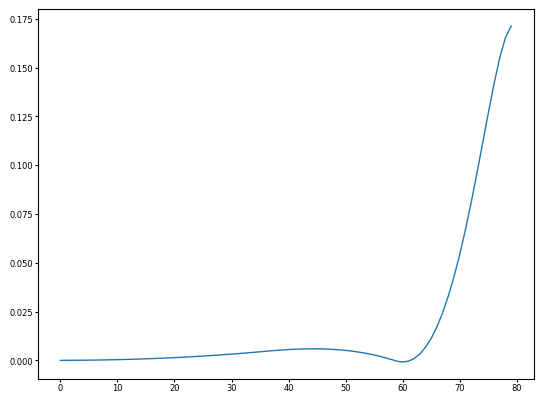

In [ ]:
plt.plot(coupling_mat[:,0,0])

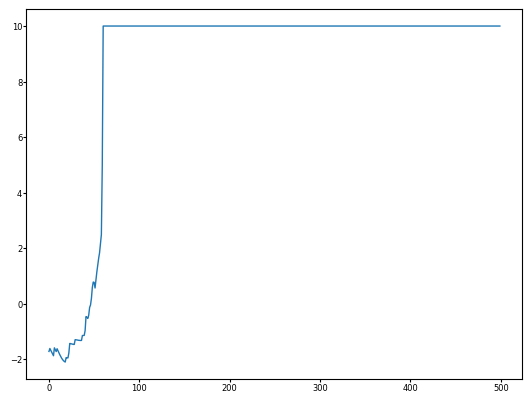

In [ ]:
plt.plot(log_firing_rate)

### All six areas

In [ ]:
# The following hyperparameters turned out to be the best
num_f_refractory = 4
max_iter = 10
tau = 15
# coupling_filter_params = {'peaks_max':26, 'num':3, 'nonlinear':0.9}
coupling_filter_params = {'peaks_max':20.2, 'num':3, 'nonlinear':0.5}
num_basis_baseline = 20
penalty = 5e-1

################ No need to change below
probe_list = V1.selected_probes

running_model_list = []
stationary_model_list = []

for i, target_probe in tqdm(enumerate(probe_list)):
    select_trials = V1.running_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j], apply_no_penalty=True, **coupling_filter_params)
#     model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    running_model_list.append(model)
    
    select_trials = V1.stationary_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j],apply_no_penalty=True, **coupling_filter_params)
#     model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    stationary_model_list.append(model)


6it [03:09, 31.63s/it]


In [ ]:
MAX_FIRING_RATE = 10
# MAX_FIRING_RATE = np.log(np.array([0.70520469, 0.29707425, 1.10850376, 0.56863778, 1.64858215, -0.24620009])+0.3)
model_list = running_model_list
itrial = 1

import copy
import numpy.random
nneuron = len(model_list)
# Get three dimension matrix of coupling filters for better computing. 
max_histories = 1
nt = model_list[0].nt
# allowed_effect_type = ['inhomogeneous_baseline', 'coupling']
allowed_effect_type = ['inhomogeneous_baseline', 'coupling', 'trial_coef']
coupling_mat = np.zeros((max_histories, nneuron, nneuron))
baseline_mat = np.zeros((nt, nneuron))
spikes = np.zeros((nt, nneuron, 1))
probe2num = {}
for iprobe, probe in enumerate(probe_list):
    probe2num[probe] = iprobe

for ineuron in range(nneuron):
    assert all(effect_type in allowed_effect_type for effect_type in model_list[ineuron].effect_type_list), "Only support inhomogeneous_baseline and coupling effects now!"
    model = model_list[ineuron]
    for ieffect, effect_type in enumerate(model.effect_type_list):
        
        if effect_type in ['inhomogeneous_baseline', ]:
            baseline_mat[:, ineuron] = model.filters[ieffect]
            baseline_mat[:, ineuron] = GLM.apply_warping_to_predictors(V1.time_line, 
                                                                       baseline_mat[:, ineuron][:,None], 
                                                                       model_list[ineuron].shifts[itrial,:][None,:], 
                                                                       model_list[ineuron].nt).squeeze()
            baseline_mat[:, ineuron] += model.results.params[model.trial_coef_start+itrial]
            
        elif effect_type in ['coupling']:
            nhistories = len(model.filters[ieffect])
            probe_name = utils.PROBE_CORRESPONDING_INVERSE[model.basis_name[ieffect][-2:]]
            iprobe = probe2num[probe_name]
            if nhistories > max_histories:
                coupling_mat_old = coupling_mat
                coupling_mat = np.zeros((nhistories, nneuron, nneuron))
                coupling_mat[-max_histories:, :, :] = coupling_mat_old
                max_histories = nhistories
            coupling_mat[-nhistories:, iprobe, ineuron] = np.flip(model.filters[ieffect])

log_firing_rate = baseline_mat[:,:,np.newaxis]
spikes[0,:,0] = np.random.poisson(np.exp(log_firing_rate[0,:,0]))

recent_spike_sum = spikes[0, :, 0]

for t in range(1, nt):
    nhistories = min(t, max_histories)
    temp_log_firing_rate = (coupling_mat[-nhistories:, :, :] * spikes[(t-nhistories):(t), :, :]).sum(axis=(0, 1))
    log_firing_rate[t,:,0] += temp_log_firing_rate
    log_firing_rate[t,:,0] = np.minimum(log_firing_rate[t,:,0], MAX_FIRING_RATE)
    spikes[t,:,0] = np.random.poisson(np.exp(log_firing_rate[t,:,0]))

log_firing_rate = log_firing_rate.squeeze()
spikes = spikes.squeeze()

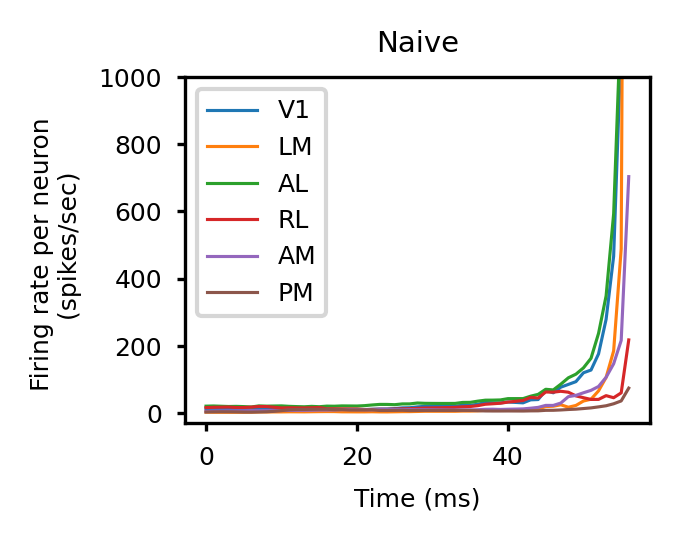

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(2,1.5), dpi=300)
try:
    to_plot_end = np.where(log_firing_rate.squeeze().max(axis=1)>=10)[0][0]
    for ii in range(6):
        i = transfer_ij[ii]
        plt.plot(np.exp(log_firing_rate.squeeze()[:to_plot_end,i])*1e3/(mean_num_neuron[i]), lw=0.75)
except IndexError:
    plt.plot(np.exp(log_firing_rate.squeeze()[:,:])*1e3/np.array(mean_num_neuron)[np.newaxis, :])
plt.legend(['V1','LM','AL','RL','AM','PM'])
plt.title("Naive")
plt.ylim([-30, 1000])
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate per neuron \n (spikes/sec)')
# plt.xlim([0, 500])
plt.savefig('Figures/Model Explanation/explosion.pdf', format='pdf', dpi=300)

## <a id='toc10_2_'></a>[$f_{damp}$ model doesn't explode](#toc0_)

### <a id='toc10_2_1_'></a>[Fit and simulate](#toc0_)

In [ ]:
# The following hyperparameters turned out to be the best
num_f_refractory = 4
max_iter = 10
tau = 15
# coupling_filter_params = {'peaks_max':26, 'num':3, 'nonlinear':0.9}
coupling_filter_params = {'peaks_max':20.2, 'num':3, 'nonlinear':0.5}
num_basis_baseline = 20
penalty = 5e-1

################ No need to change below
probe_list = V1.selected_probes

running_model_list = []
stationary_model_list = []

for i, target_probe in tqdm(enumerate(probe_list)):
    select_trials = V1.running_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j], apply_no_penalty=True, **coupling_filter_params)
    model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    running_model_list.append(model)
    
    select_trials = V1.stationary_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j],apply_no_penalty=True, **coupling_filter_params)
    model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty)
    stationary_model_list.append(model)
    

6it [05:12, 52.02s/it]


In [ ]:
# Simulate stationary
stationary_results = GLM.simulate_baseline_coupling_refractory(stationary_model_list, 
                                                               nepoch=1, offset=0.06)

100%|██████████████████████████████████████| 1/1 [00:08<00:00,  8.82s/it]


In [ ]:
# Simulate running
running_results = GLM.simulate_baseline_coupling_refractory(running_model_list, 
                                                            nepoch=1, offset=0.08)

100%|██████████████████████████████████████| 1/1 [00:05<00:00,  5.53s/it]


### <a id='toc10_2_2_'></a>[PSTH compare](#toc0_)

/tmp/ipykernel_12079/3253362776.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


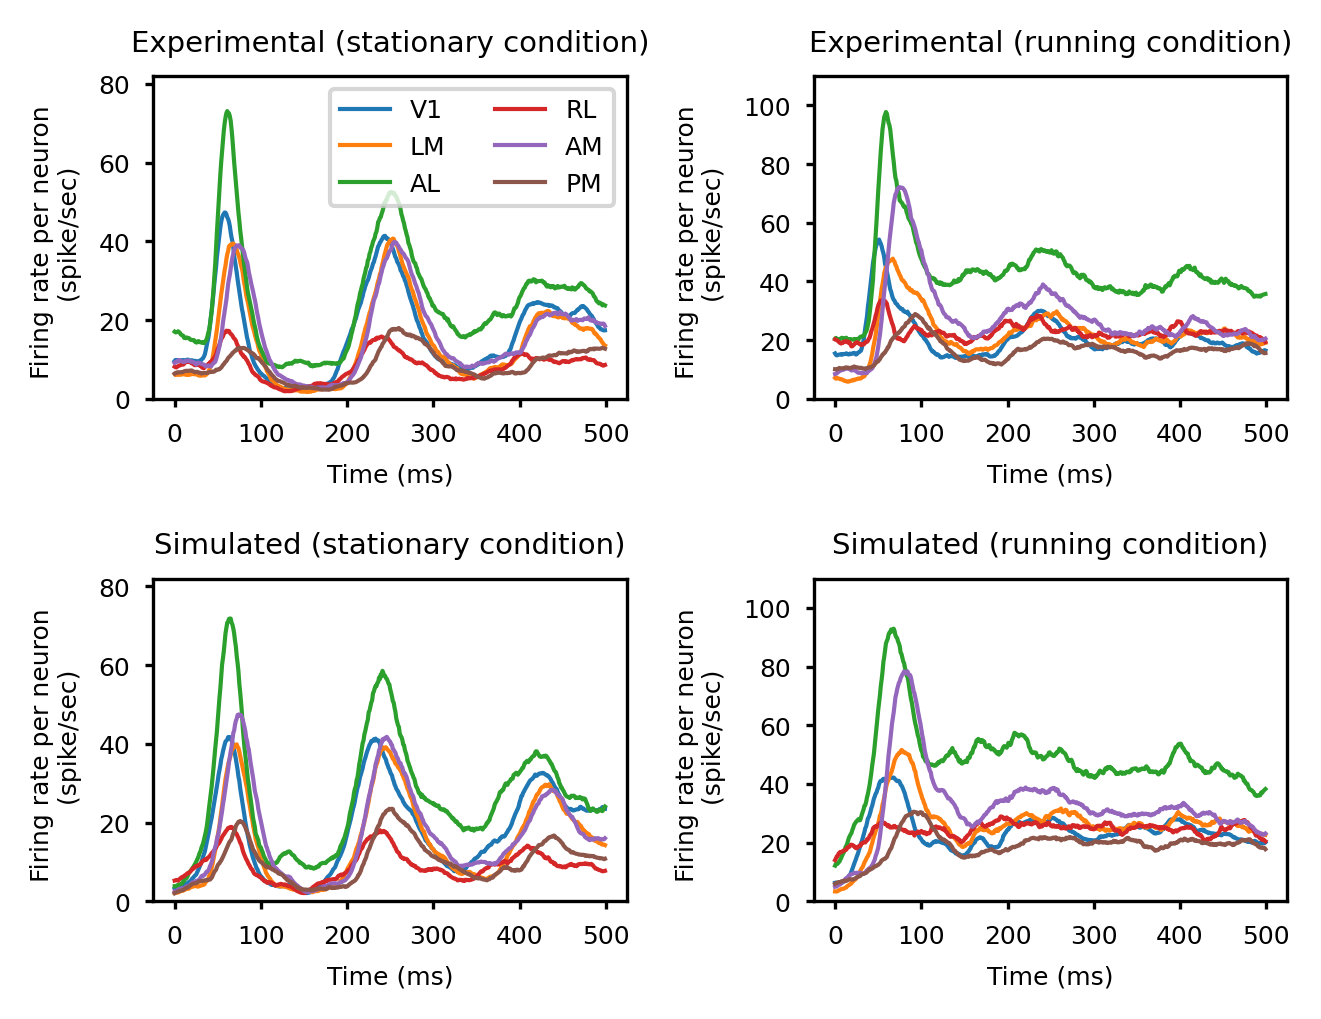

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(4.5,3.5), dpi=300)
name_list = ['V1', 'LM', 'AL', 'RL', 'AM', 'PM']

plt.subplot(2, 2, 1)
for ii in range(6):
    i = transfer_ij[ii]
    plt.plot(1e3/mean_num_neuron[i]*utils.kernel_smoothing(stationary_model_list[i].output.mean(axis=1)[:, np.newaxis], std=10), label=name_list[ii])
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate per neuron \n (spike/sec)')
plt.title('Experimental (stationary condition)')
plt.ylim([0,82])

plt.legend(loc='upper right', ncol=2)

plt.subplot(2, 2, 2)
for ii in range(6):
    i = transfer_ij[ii]
    plt.plot(1e3/mean_num_neuron[i]*utils.kernel_smoothing(running_model_list[i].output.mean(axis=1)[:, np.newaxis], std=10), label=name_list[ii])
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate per neuron \n (spike/sec)')
plt.title('Experimental (running condition)')
plt.ylim([0,110])

plt.subplot(2, 2, 3)
spikes_rcd = stationary_results[0]
for ii in range(6):
    i = transfer_ij[ii]
    plt.plot(1e3/mean_num_neuron[i]*utils.kernel_smoothing(spikes_rcd[:, :, i].mean(axis=1)[:, np.newaxis], std=10), label=name_list[ii])
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate per neuron \n (spike/sec)')
plt.title('Simulated (stationary condition)')
plt.ylim([0,82])

plt.subplot(2, 2, 4)
spikes_rcd = running_results[0]
for ii in range(6):
    i = transfer_ij[ii]
    plt.plot(1e3/mean_num_neuron[i]*utils.kernel_smoothing(spikes_rcd[:, :, i].mean(axis=1)[:, np.newaxis], std=10), label=name_list[ii])
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate per neuron \n (spike/sec)')
plt.title('Simulated (running condition)')
plt.ylim([0,110])

plt.tight_layout()
plt.savefig('Figures/SupFig/PSTH.pdf', format='pdf', dpi=300)

### <a id='toc10_2_3_'></a>[Single trial plot](#toc0_)

Text(0.5, 1.0, 'With correction term $f_{damp}(\\Lambda)$')

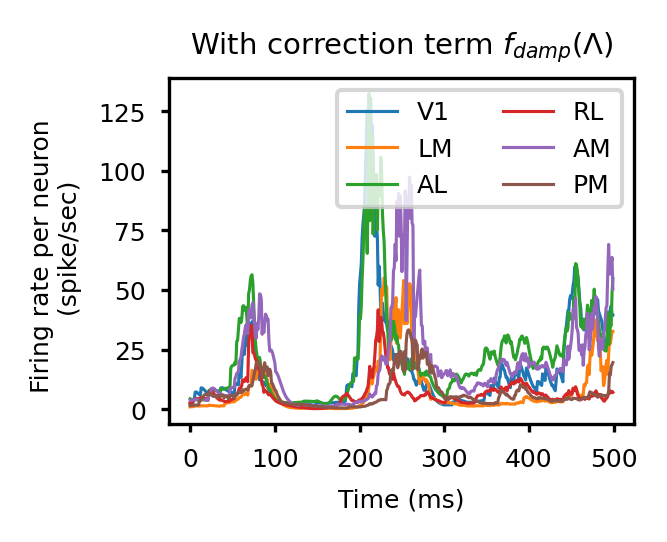

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(2,1.5), dpi=300)

log_firing_rate = stationary_results[1]
itrial = 73

for ii in range(6):
    i = transfer_ij[ii]
    plt.plot(np.exp(log_firing_rate[:, itrial, i])*1e3/(mean_num_neuron[i]), lw=0.75)
plt.legend(['V1','LM','AL','RL','AM','PM'], loc="upper right", fontsize=6, ncol=2)
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate per neuron \n (spike/sec)')
plt.title('With correction term $f_{damp}(\Lambda)$')
# plt.savefig('Figures/Model Explanation/non explosion.pdf', format='pdf', dpi=300)

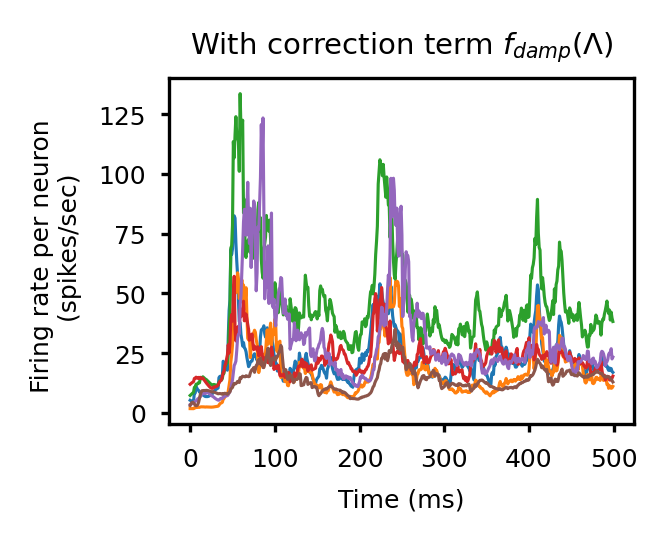

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(2,1.5), dpi=300)

log_firing_rate = running_results[1]
itrial = 63

for ii in range(6):
    i = transfer_ij[ii]
    plt.plot(np.exp(log_firing_rate[:, itrial, i])*1e3/(mean_num_neuron[i]), lw=0.75)
# plt.legend(['V1','LM','AL','RL','AM','PM'], loc="upper right", fontsize=6, ncol=2)
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate per neuron \n (spikes/sec)')
plt.title('With correction term $f_{damp}(\Lambda)$')
# plt.ylim([0,150])
plt.savefig('Figures/Model Explanation/non explosion.pdf', format='pdf', dpi=300)

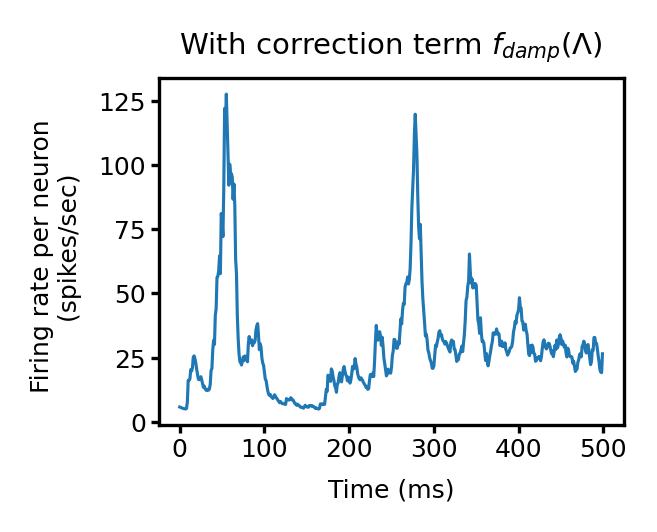

In [ ]:
utils.use_pdf_plot()
plt.subplots(figsize=(2,1.5), dpi=300)

log_firing_rate = running_results[1]
itrial = 1

# for ii in range(6):
ii = 0
i = transfer_ij[ii]
plt.plot(np.exp(log_firing_rate[:, itrial, i])*1e3/(mean_num_neuron[i]), lw=0.75)
# plt.legend(['V1','LM','AL','RL','AM','PM'], loc="upper right", fontsize=6, ncol=2)
plt.xlabel('Time (ms)')
plt.ylabel('Firing rate per neuron \n (spikes/sec)')
plt.title('With correction term $f_{damp}(\Lambda)$')
# plt.ylim([0,150])
plt.savefig('Figures/Model Explanation/non explosion v1.pdf', format='pdf', dpi=300)

### <a id='toc10_2_4_'></a>[Correlation and partial correlation are not captured well in our model](#toc0_)

Doesn't really work

In [ ]:
peaks_rcd = np.concatenate((stationary_results[2], running_results[2]), axis=1)
peaks_rcd.shape

(2, 210, 6)

In [ ]:
GLM.corr(peaks_rcd[1, :, 2:5])

array([[1.        , 0.47500245, 0.49626004],
       [0.47500245, 1.        , 0.42545703],
       [0.49626004, 0.42545703, 1.        ]])

In [ ]:
GLM.partial_corr(peaks_rcd[1, :, 2:5])

array([[1.        , 0.45417127, 0.45959725],
       [0.45417127, 1.        , 0.36032551],
       [0.45959725, 0.36032551, 1.        ]])

# <a id='toc11_'></a>[Other plots](#toc0_)

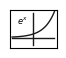

In [ ]:
# Plot exp nonlinearity
xx = np.linspace(-2,2,100)
yy = np.exp(xx)

plt.subplots(figsize=(0.6,0.5))
plt.plot(xx,yy, 'k')
plt.xticks([])
plt.yticks([])
plt.xlim([-2.2,2.2])
plt.ylim([-3, 8])
plt.plot([0,0],[-2,7],'k')
plt.plot([-2,2],[0,0],'k')
plt.text(-1.5, 4, r'$e^x$',fontsize=6)

plt.savefig('Figures/Model Explanation/exp.pdf', format='pdf', dpi=300)

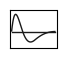

In [ ]:
# Plot filter
yy = stationary_model_list[2].get_filter()[2]

plt.subplots(figsize=(0.6,0.5))
plt.plot(yy, 'k')
plt.xticks([])
plt.yticks([])
plt.xlim([-3,82])
plt.ylim([-0.03, 0.04])
plt.plot([0,80],[0,0],'k')
# plt.text(-1.5, 4, r'$e_x$',fontsize=10)

plt.savefig('Figures/Model Explanation/coupling filter.pdf', format='pdf', dpi=300)

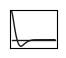

In [ ]:
# Plot filter
yy = stationary_model_list[2].get_filter()[5]

plt.subplots(figsize=(0.6,0.5))
plt.plot(yy, 'k')
plt.xticks([])
plt.yticks([])
plt.xlim([-3,82])
# plt.ylim([-0.03, 0.04])
plt.plot([0,80],[0,0],'k')
# plt.text(-1.5, 4, r'$e_x$',fontsize=10)

plt.savefig('Figures/Model Explanation/self-history filter.pdf', format='pdf', dpi=300)

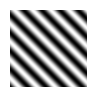

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Image dimensions
plt.subplots(figsize=(1,1))
width, height = 300, 300

# Grating parameters
frequency = 0.02  # Spatial frequency of the grating, in cycles/pixel
angle = 45  # Angle of the grating, in degrees. 0 is horizontal, 90 is vertical.

# Create a 2D grating
x = np.linspace(0, width, width, endpoint=False)  # x coordinates, one pixel spacing
y = np.linspace(0, height, height, endpoint=False)  # y coordinates, one pixel spacing
X, Y = np.meshgrid(x, y)  # 2D meshgrid

# Compute angle in radians and set up the grating
theta = math.radians(angle)  # Convert angle to radians
Xt = X * math.cos(theta) - Y * math.sin(theta)  # Rotate the grid

# Generate the grating
grating = 0.5 * (1.0 + np.sin(2.0 * np.pi * frequency * Xt))

# Display the grating using matplotlib
plt.imshow(grating, cmap='gray', extent=(0, width, 0, height))
plt.axis('off')
plt.savefig('Figures/Model Explanation/drifting gratings.pdf', format='pdf', dpi=300)

# Post-spike filter of every neuron estimated pre stimulus

In [ ]:
probe_list = ['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF']

# Load data
start_time = -0.5
end_time = 0.0
padding = 0.3
V1_pre = Allen_dataset(fps=1000,
                   start_time=start_time, 
                   end_time=end_time,
                   padding=padding,
#                    orientation=[0],
                   session_id=757216464,
                   selected_probes=['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF'],
#                    temporal_frequency=[1,2,4],
                   stimulus_condition_id=[275, 277, 246, 255, 272, 248, 283, 266, 274, 276, 286, 271, 268, 270],
#                    stimulus_condition_id=[246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261, 
#                                           262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 273, 274, 275, 276, 277,
#                                           278, 279, 280, 281, 282, 283, 284, 285, 286, 270],
                   stimulus_name='drifting_gratings')

# V1_pre.get_lfp()
# V1_pre.remove_padding(padding)
V1_pre.get_trial_metric_per_unit_per_trial()
# V1_pre.get_trial_metric_per_unit_per_trial(metric_type='spike_times')
# V1_pre.get_running(method="mine")

/home/qix/anaconda3/lib/python3.9/site-packages/allensdk/brain_observatory/ecephys/stimulus_table/naming_utilities.py:154: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movie_rows = table[stim_colname].str.contains(movie_re, na=False)
/home/qix/anaconda3/lib/python3.9/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1315: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


In [ ]:
### Get the id of neurons that are classified as CROSS-POP and being select in cross-pop in at least ONE condition
stimulus_condition_id = [275, 277, 246, 255, 272, 248, 283, 266, 274, 276, 286, 271, 268, 270]
cross_pop_list_all = {}
probe_list = V1.selected_probes
for target_probe in probe_list:
    cross_pop_list = []
    cross_pop_conditions = {}
    for neuron in membership[0].index:
        if membership[1].loc[neuron]['probe'] == target_probe:
            for i, member in enumerate(membership):
                if member.loc[neuron]['group_id'] == 0:
                    if condition_ids[i] in stimulus_condition_id:
                        if neuron not in cross_pop_conditions:
                            cross_pop_list.append(neuron)
                            cross_pop_conditions[neuron] = [condition_ids[i]]
                        else:
                            cross_pop_conditions[neuron].append(condition_ids[i])
    major_cross_pop_list = []
    for neuron in cross_pop_list:
        if len(cross_pop_conditions[neuron])>= 1:
            major_cross_pop_list.append(neuron)
    cross_pop_list_all[target_probe] = major_cross_pop_list

In [ ]:
cross_pop_list_all

{'probeA': [951814898,
  951814995,
  951815001,
  951815091,
  951815126,
  951815173,
  951815142,
  951815207,
  951815269,
  951815239,
  951815231,
  951815250,
  951815340,
  951815333,
  951815307,
  951815403,
  951815361,
  951815453,
  951815536,
  951815588,
  951815629,
  951815663,
  951815699,
  951815816,
  951815789],
 'probeB': [951807228,
  951808366,
  951807290,
  951807276,
  951807333,
  951807325,
  951807310,
  951807373,
  951807357,
  951807379,
  951807411,
  951807479,
  951807546,
  951807531,
  951807511,
  951807587,
  951808270,
  951807553,
  951807573,
  951807622,
  951807673,
  951807734,
  951807717,
  951807742,
  951807941,
  951807973],
 'probeC': [951800803,
  951800831,
  951800909,
  951800900,
  951800877,
  951801070,
  951801053,
  951801108,
  951801101,
  951801155,
  951801115,
  951801206,
  951801172,
  951801318,
  951801302,
  951801356,
  951801369,
  951801456,
  951801532,
  951801508,
  951801559,
  951801633,
  951801604,
  9518

In [ ]:
for key, value in cross_pop_list_all.items():
    print(f"{key}: {len(value)}")

probeA: 25
probeB: 26
probeC: 32
probeD: 17
probeE: 23
probeF: 17


In [ ]:
# Must run before going to next section
spike_train_ind_pre_dict = {}
for target_probe in probe_list:
    for neuron in cross_pop_list_all[target_probe]:
        # Get spike train of the neuron first
        spike_train_ind_pre = np.zeros((V1_pre.nt+V1_pre.npadding, V1_pre.spike_train.shape[1]))
        for itrial in range(V1_pre.spike_train.shape[1]):
            spike_train_ind_pre[:,itrial] = V1_pre.spike_train.loc[neuron, V1_pre.spike_train.columns[itrial]]
        spike_train_ind_pre_dict[neuron] = spike_train_ind_pre

In [ ]:
### Get individual neuron's post-spike filters
coupling_filter_params = {'peaks_max':20.2, 'num':3, 'nonlinear':0.5}
num_basis_baseline = 5
penalty = 1e2

pre_stimulus_filter_dict = {}
for target_probe in probe_list:
    for neuron in tqdm(cross_pop_list_all[target_probe]):

        ### Stationary
        select_trials = V1.stationary_trial_index
        model_stationary = GLM.PP_GLM(dataset=V1_pre, 
                            select_trials=select_trials, 
                            membership=membership, 
                            condition_ids=condition_ids)
        model_stationary.add_effect('inhomogeneous_baseline', num=num_basis_baseline)
        # model_stationary.add_effect('homogeneous_baseline')
        spike_train_ind_pre = spike_train_ind_pre_dict[neuron]
        model_stationary.add_effect('coupling', spike_train_ind_pre, 
                                    **coupling_filter_params)
        # model_stationary.add_effect('trial_coef')
        model_stationary.fit(spike_train_ind_pre, 
                            method='mine', 
                            verbose=False, 
                            penalty=penalty)
        pre_stimulus_filter_dict[(neuron, 'stationary')] = model_stationary.get_filter()
        
        ### Running
        select_trials = V1.running_trial_index
        model_running = GLM.PP_GLM(dataset=V1_pre, 
                            select_trials=select_trials, 
                            membership=membership, 
                            condition_ids=condition_ids)
        model_running.add_effect('inhomogeneous_baseline', num=num_basis_baseline)
        # model_running.add_effect('homogeneous_baseline')
        spike_train_ind_pre = spike_train_ind_pre_dict[neuron]
        model_running.add_effect('coupling', spike_train_ind_pre, 
                                **coupling_filter_params)
        # model_running.add_effect('trial_coef')
        model_running.fit(spike_train_ind_pre, 
                            method='mine', 
                            verbose=False, 
                            penalty=penalty)
        pre_stimulus_filter_dict[(neuron, 'running')] = model_running.get_filter()

  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:01<00:00, 15.56it/s]


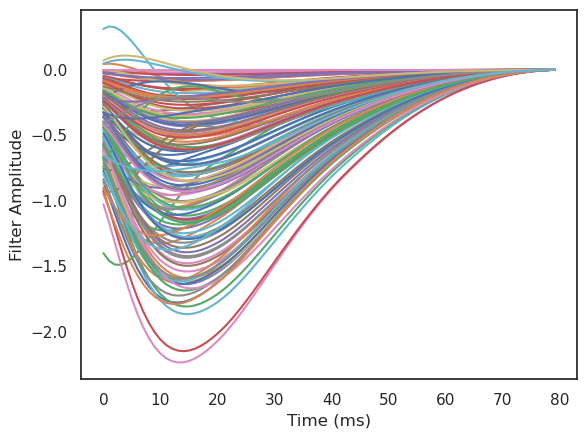

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

for target_probe in probe_list:
    # Loop over each neuron in cross_pop_list_all
    for neuron in cross_pop_list_all[target_probe]:
        # Get the filter for the current neuron and trial type
        filter_data = pre_stimulus_filter_dict[(neuron, 'running')][1]
        # Plot the filter
        ax.plot(filter_data, label=f'Neuron {neuron}')

# Add a legend and axis labels
# ax.legend()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Filter Amplitude')

# Show the plot
plt.show()

In [ ]:
### Get the groud truth history effects from indivudal neuron's post-spike filters. 
def get_accumulated_history(membership, condition_ids, dataset, probe_name, group_id, 
                            filters, use_all=False):
    """
    'spike train' is a df. 
    """
    
    spike_train = dataset.spike_train
    condition_list = dataset.presentation_table['stimulus_condition_id']
    nt = len(spike_train.iloc[0,0])
    accumulated_history = np.zeros((nt-dataset.npadding, spike_train.shape[1]))
    
    for itrial in range(spike_train.shape[1]):
        if V1.stationary_trial_index[itrial]==True:
            state = 'stationary'
        else:
            state = 'running'
        try:
            trial = spike_train.columns[itrial]
            current_condition = condition_list.loc[trial]
            current_membership = membership[np.where(condition_ids==current_condition)[0][0]]
            idx = current_membership[(current_membership['probe']==probe_name) \
                & (current_membership['group_id']==group_id)].index.values
            done = True
        except:
            done = False
        if use_all==True or done==False or idx.sum() == 0:
            # if don't get any group information in 'membership', just use all neurons 
            idx = dataset._session.units[
                dataset._session.units['ecephys_structure_acronym'].isin(VISUAL_AREA) &
                dataset._session.units['probe_description'].isin([probe_name])].index.values
            # idx = dataset._session.units[dataset._session.units['probe_description']==probe_name]
        new_df =  spike_train.loc[idx]
        for iunit in range(new_df.shape[0]):

            filter = filters[(new_df.index[iunit], state)][1]
            output = GLM.conv(new_df.iloc[iunit, itrial], filter, npadding=dataset.npadding)
            accumulated_history[:,itrial] += np.exp(output.squeeze())
        accumulated_history[:,itrial] = np.log(accumulated_history[:,itrial])
        accumulated_history[:,itrial] += -np.sqrt(new_df.shape[0])
    return accumulated_history
    
accumulated_history = {}
for i, target_probe in tqdm(enumerate(probe_list)):
    accumulated_history[target_probe] = get_accumulated_history(membership, condition_ids, V1, target_probe, 0, 
                                        pre_stimulus_filter_dict, use_all=False)

0it [00:00, ?it/s]

6it [00:01,  3.02it/s]


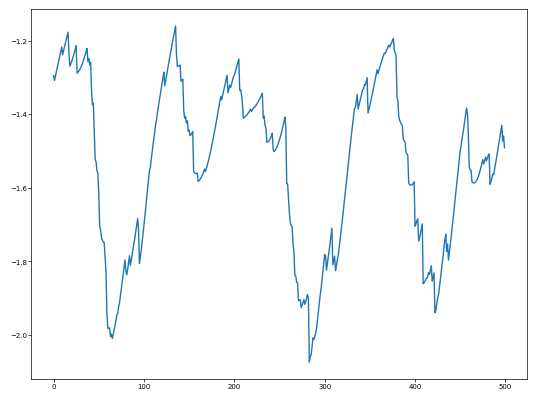

In [ ]:
plt.plot(accumulated_history["probeC"][:,1])

In [ ]:
# The following hyperparameters turned out to be the best
num_f_refractory = 4
max_iter = 10
tau = 15
coupling_filter_params = {'peaks_max':20.2, 'num':3, 'nonlinear':0.5}
num_basis_baseline = 20
penalty = 5e-1

################ No need to change below
probe_list = V1.selected_probes
running_filter = {}
stationary_filter = {}
running_output = {}
stationary_output = {}

ROI_filter = {}
statistics_filter = {}
ROI_output = {}
statistics_output = {}

running_model_list = []
stationary_model_list = []

for i, target_probe in tqdm(enumerate(probe_list)):
    select_trials = V1.running_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j], apply_no_penalty=True, **coupling_filter_params)
    # model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
#     model.add_effect('refractory', target_probe, tau=tau, order=1.5, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty, 
                                    offset=accumulated_history[target_probe])
    running_model_list.append(model)
    
    filter_list = model.get_filter(ci=True)
    for j in range(len(model.basis_list)):
        running_filter[i,j-1] = filter_list[j]
    output_list = model.get_filter_output(intermediate=False, ci=True)
    for j in range(len(model.basis_list)):
        running_output[i,j-1] = output_list[j]
    
    select_trials = V1.stationary_trial_index
    model = GLM.PP_GLM(dataset=V1, 
                       select_trials=select_trials, 
                       membership=membership, 
                       condition_ids=condition_ids)
    model.add_effect('inhomogeneous_baseline', num=num_basis_baseline, apply_no_penalty=True)
    for j, input_probe in enumerate(probe_list):
        model.add_effect('coupling', probe_list[j],apply_no_penalty=True, **coupling_filter_params)
    # model.add_effect('refractory_additive', target_probe, tau=tau, num=num_f_refractory, apply_no_penalty=True)
#     model.add_effect('refractory', target_probe, tau=tau, order=1.5, apply_no_penalty=True)
    model.add_effect('trial_coef')
    model.fit_time_warping_baseline(target_probe, verbose=False, max_iter=max_iter, penalty=penalty,
                                    offset=accumulated_history[target_probe])
    stationary_model_list.append(model)
    
    filter_list = model.get_filter(ci=True)
    for j in range(len(model.basis_list)):
        stationary_filter[i,j-1] = filter_list[j]
    output_list = model.get_filter_output(intermediate=False, ci=True)
    for j in range(len(model.basis_list)):
        stationary_output[i,j-1] = output_list[j]
    
aic = np.sum([model.aic for model in stationary_model_list]+[model.aic for model in running_model_list])
baseline_aic = 570714.232742189
print(f"AIC improvement of the model is: {(baseline_aic - aic)}")

bic = np.sum([model.bic for model in stationary_model_list]+[model.bic for model in running_model_list])
baseline_bic = 588924.4932276756
print(f"BIC improvement of the model is: {(baseline_bic - bic)}")

0it [00:00, ?it/s]

6it [03:13, 32.26s/it]

AIC improvement of the model is: -264.01271868357435
BIC improvement of the model is: 2706.8115443038987


In [ ]:
stationary_filter_exact_history = stationary_filter
running_filter_exact_history = running_filter

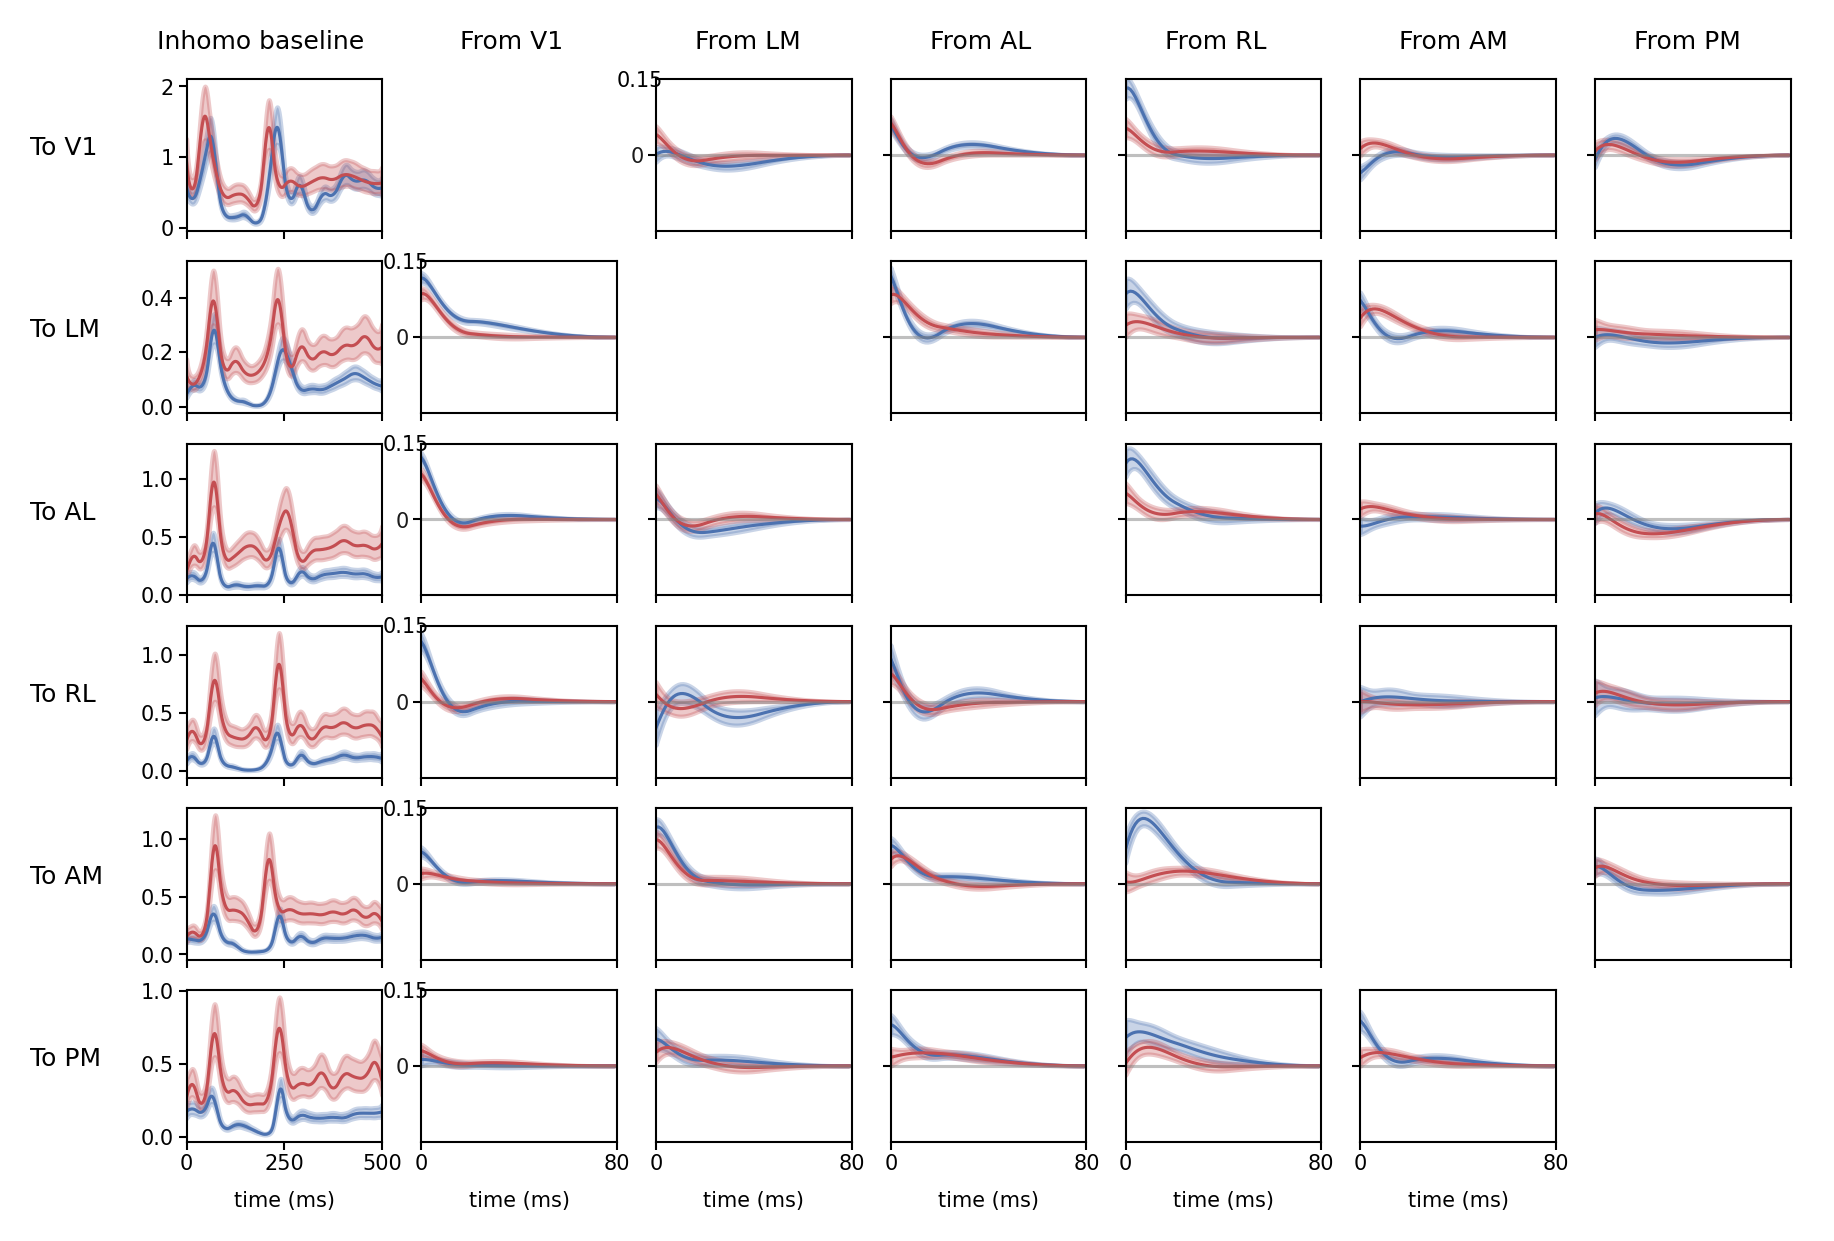

In [ ]:
GLM.plot_function_with_excursion(V1, stationary_filter_exact_history, running_filter_exact_history, inference=False, plot_baseline=True, 
                              plot_self=False, dpi=300)
# plt.show()
plt.savefig('Figures/SupFig/use_exact_history.pdf', format='pdf', dpi=300)